# <span style='color:orange'> CREDIT EDA ASSIGNMENT

##  Understanding the Bussiness:
### The loan providing companies find it hard to give loans to people due to their insufficeint or non exstient credit history
Beacuse of that some consumers use it to thier advantage by becomimg defaulter.

### So in this case study we are going to analyse such that the applicants capale of repaying the loans are not rejected.
When Comapny receives a loan application, the company has to decide for loan approval based upon applicants profile.

## Risks Associated with bank's decision:
1. If the applicant is likely to repay the loan, then not approving the loan results in loss of bussiness to the company.

2. IF applicant is not likely to repay the loan, then approving loan may lead to fiancial loss for the company.



## <span style='color:red'> 1. Importing Necessary Libraries.</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
palette = sns.color_palette('Set1')

## <span style='color:red'> 2. Loading Datasets.

In [2]:
# loading the application_data.csv file as app_data variable
app_data = pd.read_csv('C:\\USers\\warad\\Downloads\\EDA CAse Study\\application_data.csv')


In [3]:
# Lets See First five rows by using head function.
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
# shape of app_data
app_data.shape

(307511, 122)

In [5]:
# Loading the previous_application.csv file as prev_appli
prev_appli = pd.read_csv('C:\\Users\\warad\\Downloads\\EDA CAse Study\\previous_application.csv') 

In [6]:
# First five rows of prev_appli
prev_appli.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [7]:
# Shape of prev_appli
prev_appli.shape

(1670214, 37)

In [8]:
# Loading Columns_description data as cols_descrp
file_path = "C:\\Users\\warad\\Downloads\\EDA CAse Study\\columns_description.csv"
cols_descrp = pd.read_csv(file_path, header=2, encoding='latin-1')

In [9]:
cols_descrp

2          application_data                     TARGET  \
0      5          application_data         NAME_CONTRACT_TYPE   
1      6          application_data                CODE_GENDER   
2      7          application_data               FLAG_OWN_CAR   
3      8          application_data            FLAG_OWN_REALTY   
4      9          application_data               CNT_CHILDREN   
..   ...                       ...                        ...   
153  209  previous_application.csv             DAYS_FIRST_DUE   
154  210  previous_application.csv  DAYS_LAST_DUE_1ST_VERSION   
155  211  previous_application.csv              DAYS_LAST_DUE   
156  212  previous_application.csv           DAYS_TERMINATION   
157  213  previous_application.csv  NFLAG_INSURED_ON_APPROVAL   

    Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)  \
0          Identification if loan is cash or revolving                                                                                                                                            
1                                 Gender of the client                                                                                                                                            
2                        Flag if the client owns a car                                                                                                                                            
3                  Flag if client owns a house or flat                                                                                                                                            
4                    Number of children the client has                                                                                                                                            
..                                                 ...                                                                                                                                            
153  Relative to application date of current applic...                                                                                                                                            
154  Relative to application date of current applic...                                                                                                                                            
155  Relative to application date of current applic...                                                                                                                                            
156  Relative to application date of current applic...                                                                                                                                            
157  Did the client requested insurance during the ...                                                                                                                                            

                                Unnamed: 4  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
153  time only relative to the application  
154  time only relative to the application  
155  time only relative to the application  
156  time only relative to the application  
157                                    NaN  

[158 rows x 5 columns]

## <span style='color:red'> 3. Checking Basic dimensions of Dataset.

### For appl_data

In [10]:
app_data.shape

(307511, 122)

In [11]:
app_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [12]:
# Checking null values
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

###  For Prev_appli


In [13]:
prev_appli.shape

(1670214, 37)

In [14]:
prev_appli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [15]:
# checking null values:
prev_appli.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

## <span style='color:red'> 4. Missing values and Data quality.

###  For application data:

In [16]:
# Percentage missing values:
app_data.isnull().mean() * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [17]:
# Columns with missing values more than 40%:
percent_app = app_data.isnull().mean() *100
app_40percentplus = app_data.columns[percent_app>40]
temporary = app_data[app_40percentplus]
temporary.isnull().mean() *100

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [18]:
app_data.shape[1]

122

In [19]:
temporary.shape[1]

49

In [20]:
app_data.shape[1]- temporary.shape[1]

73

## <span style='color:blue'> Obeservations
    1. There are 49 columns with mopre than 40% missing values in application_data dataset.
    2. There will be 73 columns left after removing the 49 columns. 

## <span style='color:red'> Removing columns more than 40% missing values from application data table:


In [21]:
app_data = app_data[app_data.columns[percent_app <= 40]]
app_data.shape[1]

73

In [22]:
# Again checking the application data.
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)
null_percent = app_data.isnull().mean()*100
null_col_app_data = null_percent[null_percent!=0]
print(null_col_app_data)
print('The number of columns having missing values out of 73 columns are', len(null_col_app_data))
print('The number of Non Null Columns are: ',app_data.shape[1] - len(null_col_app_data))

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64
The number of columns having missing values out of 73 columns are 18
The number of Non Null Columns are:  55


## <span style='color:blue'> Observations:

#### 1. There are 73 columns after removing more than 40 percent columns.
#### 2. In these columns OCCUPATION_TYPE  has highest 31.34% missing values.
#### 3. EXT_SOURCE_3 has second highest 19.82% missing values.
#### 4. Last six columns has 13.5% missing values.
#### 5. Rest colomns has less than 1% mising values.
#### 6. 55 columns out of 73 are non null.
#### 7. The missing values from remaining 18 columns can be imputed using mean/median/mode or by any other condition specified. 


#### <span style='color:red'> Looking at OCCUPATION_TYPE  column as it has highest 31.34% missing values

In [23]:
app_data.OCCUPATION_TYPE.mode()[0]

'Laborers'

In [24]:
app_data.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [25]:
app_data.OCCUPATION_TYPE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: OCCUPATION_TYPE
Non-Null Count   Dtype 
--------------   ----- 
211120 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


#### <span Style='color:blue'> Distribution of OCCUPATION_TYPE column

In [26]:
occupation_in= app_data.OCCUPATION_TYPE.value_counts()
occupation_in

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

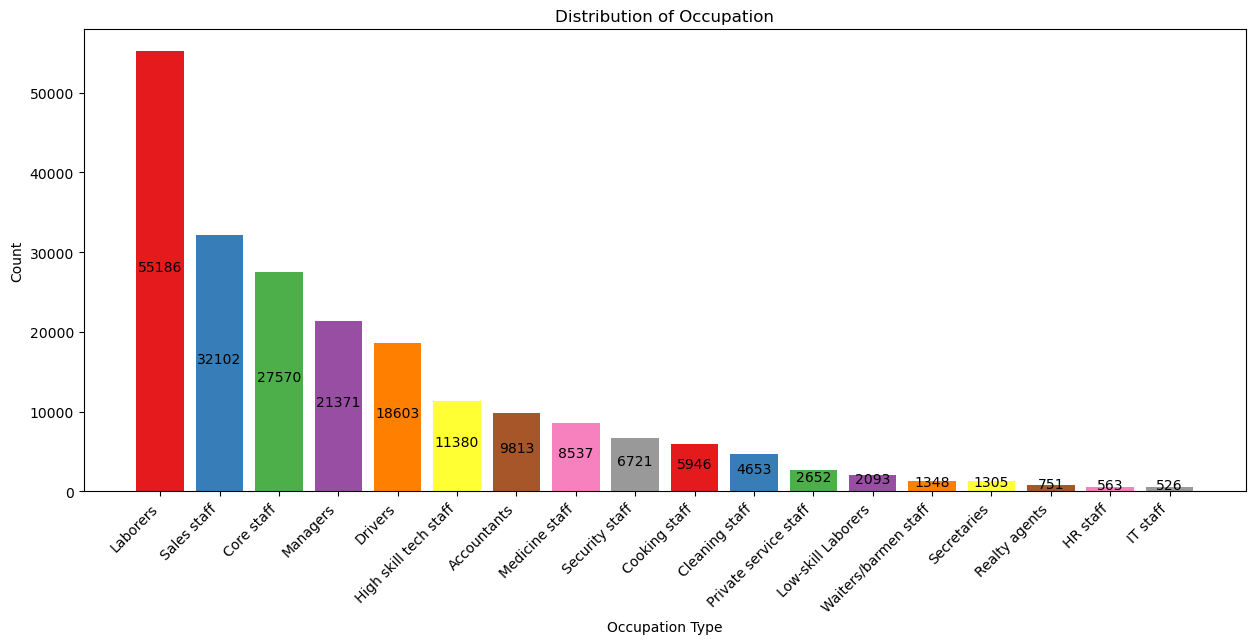

In [27]:
plt.figure(figsize=(15,6))
plt.bar(occupation_in.index,occupation_in, color=palette)
for i in range(len(occupation_in)):
    plt.text(i,occupation_in[i]//2, occupation_in[i], ha='center')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
## looking for columns wich may give imputation hints:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [29]:
# AMT_INCOME_TOTAL may have relation with Occupation. so lets see missing values of AMT_INCOME_TOTAL
app_data.AMT_INCOME_TOTAL.isnull().sum()

0

In [30]:
app_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

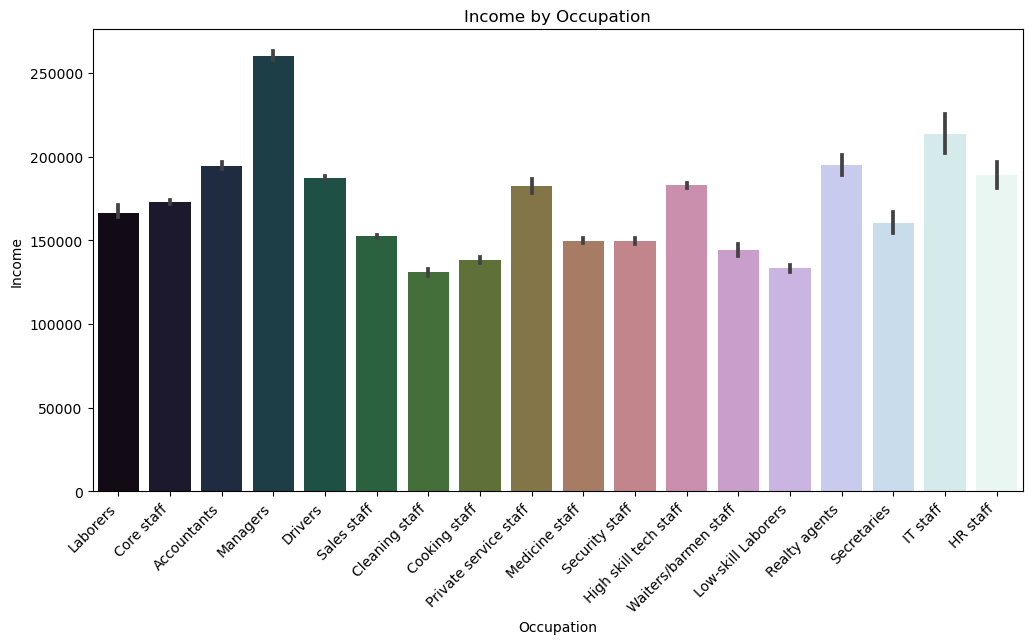

In [31]:
## Ploting how Occupation Type varies by income(income by occupation):
plt.figure(figsize=(12,6))
sns.barplot( x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL',data=app_data, palette='cubehelix')
plt.title('Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Income')
plt.xticks(rotation=45, ha='right')


plt.show()

In [32]:
# missing values in occupation type 
app_data.OCCUPATION_TYPE.isnull().sum()

96391

In [33]:
len(app_data.OCCUPATION_TYPE)

307511

## <span style='color:blue'> Observations
    1. Most frequent Occupation type applying for loans is Laborers.
    2. THere is no null values in AMT_INCOME_TOTAL col.
    3. 96391 out of 307511 values are missing in OCCUPATION_TYPE col.
    4. It looks like AMT_INCOME_TOTAL  may have possible realation with with OCCPATION_TYPE col .

In [34]:
# Now replacing null values wuth "others"

In [35]:
app_data.OCCUPATION_TYPE = app_data.OCCUPATION_TYPE.fillna('others')

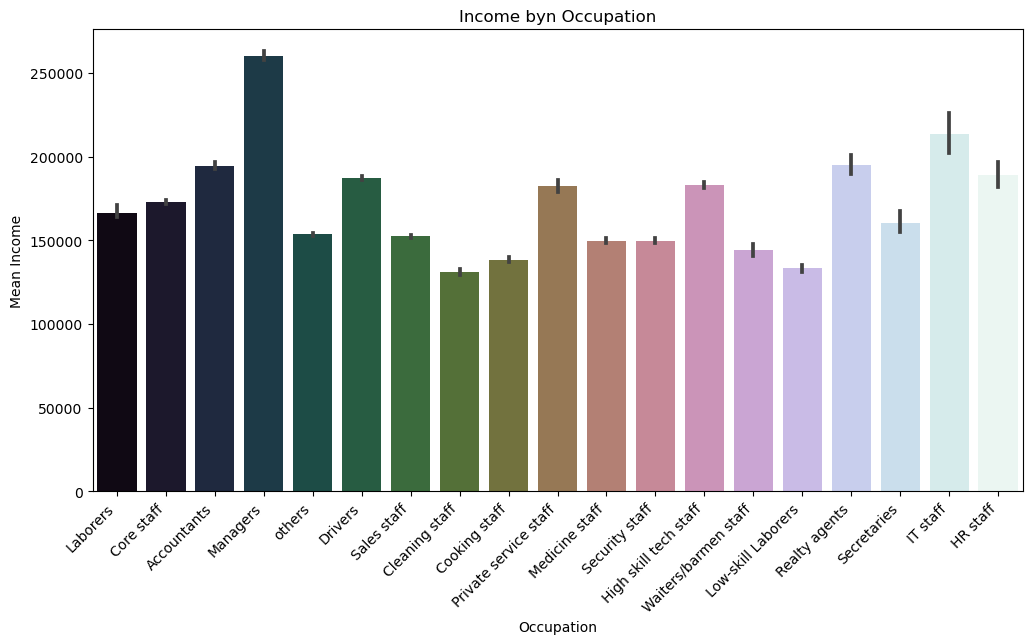

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', data=app_data, palette='cubehelix')
plt.title('Income byn Occupation')
plt.xlabel('Occupation')
plt.ylabel('Mean Income')
plt.xticks(rotation=45, ha='right')
plt.show()

### <span style='color:blue'> Observation
    1. Others Category has somewhere around 1.5 lakh mean income.
    2. Higest mean income occupation: Managers.
    3. lowest mean income: Cleaning Staff.
        

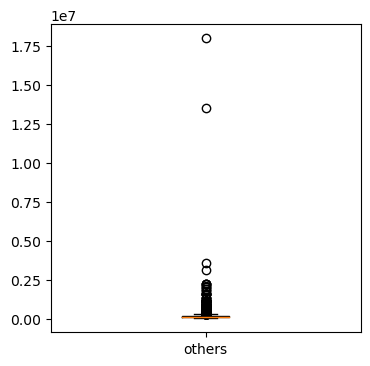

In [37]:
# RAnge of others column:
plt.figure(figsize=(4,4))
data_others = app_data[app_data['OCCUPATION_TYPE'] == 'others']
plt.boxplot(data_others['AMT_INCOME_TOTAL'], labels=['others'])
plt.show()

In [38]:
# Cretaing income bin as new column: to impute values

In [39]:
# Must run:
income_bins = [0,30000,44000,100000,150000,210000, float('inf')]
income_labels= ['Low', 'Midle_low', 'Middle', 'Middle_High', 'High', 'Very_High']

app_data['Income_bin'] = pd.cut(app_data['AMT_INCOME_TOTAL'], bins= income_bins, labels=income_labels, include_lowest=True)



In [40]:
print(app_data[['AMT_INCOME_TOTAL','Income_bin','OCCUPATION_TYPE']].head(15))

    AMT_INCOME_TOTAL   Income_bin OCCUPATION_TYPE
0         202500.000         High        Laborers
1         270000.000    Very_High      Core staff
2          67500.000       Middle        Laborers
3         135000.000  Middle_High        Laborers
4         121500.000  Middle_High      Core staff
5          99000.000       Middle        Laborers
6         171000.000         High     Accountants
7         360000.000    Very_High        Managers
8         112500.000  Middle_High          others
9         135000.000  Middle_High        Laborers
10        112500.000  Middle_High      Core staff
11         38419.155    Midle_low          others
12         67500.000       Middle        Laborers
13        225000.000    Very_High         Drivers
14        189000.000         High        Laborers


In [41]:
# finding the most occuring OOCUPATION_TYPE category in each income bin excluding others category.
filtered_data = app_data[app_data['OCCUPATION_TYPE']!= 'others']

# MOst occuring occupation type:
most_common_occupatiion_by_income = filtered_data.groupby('Income_bin')['OCCUPATION_TYPE'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'others').to_dict()

for income_bins, most_common_occupation in most_common_occupatiion_by_income.items():
    print(f'Most common OCCUPATION_TYPE in {income_bins} :  {most_common_occupation}')

Most common OCCUPATION_TYPE in Low :  Cleaning staff
Most common OCCUPATION_TYPE in Midle_low :  Core staff
Most common OCCUPATION_TYPE in Middle :  Laborers
Most common OCCUPATION_TYPE in Middle_High :  Laborers
Most common OCCUPATION_TYPE in High :  Laborers
Most common OCCUPATION_TYPE in Very_High :  Managers


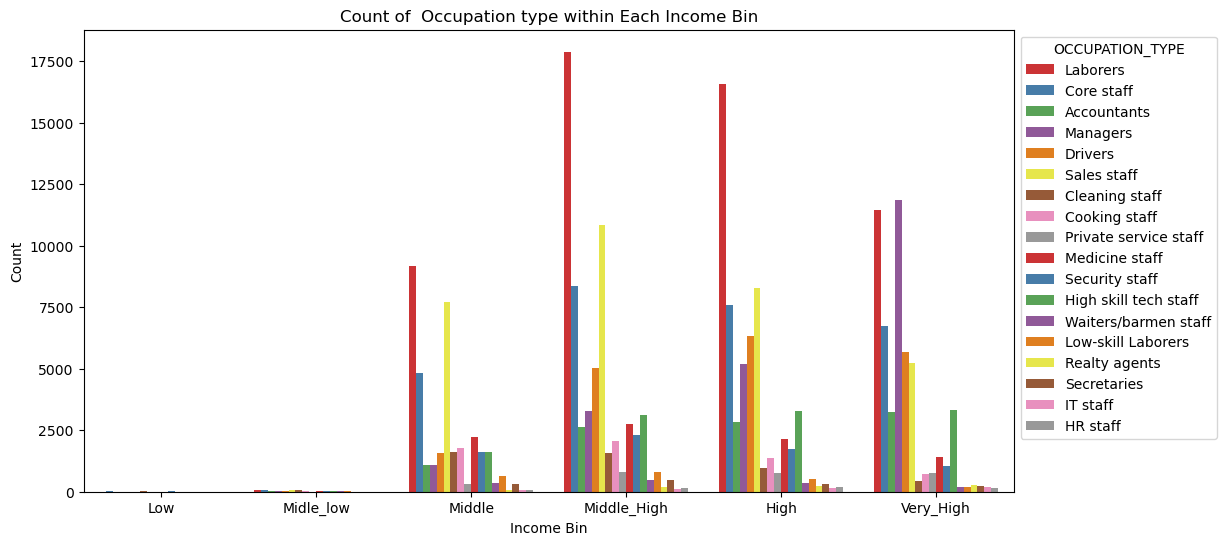

In [42]:
# Data Distribution:
filtered_data = app_data[app_data['OCCUPATION_TYPE'] != 'others']

plt.figure(figsize=(12,6))
sns.countplot(x='Income_bin', hue='OCCUPATION_TYPE', palette='Set1', data= filtered_data)
plt.title('Count of  Occupation type within Each Income Bin')
plt.xlabel('Income Bin')
plt.ylabel('Count')
plt.legend(title='OCCUPATION_TYPE', bbox_to_anchor=(1,1))
plt.show()

## EXT_SOURCE_3 col has second highest 19.82% of missing values.
    General inspection EXT_SOURCE_3 col.

In [43]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [44]:
app_data.EXT_SOURCE_3.isnull().sum()

60965

In [45]:
app_data.EXT_SOURCE_3.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: EXT_SOURCE_3
Non-Null Count   Dtype  
--------------   -----  
246546 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [46]:
app_data.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [47]:
app_data.EXT_SOURCE_3.mean()

0.5108529061799658

In [48]:
app_data.EXT_SOURCE_3.median()

0.5352762504724826

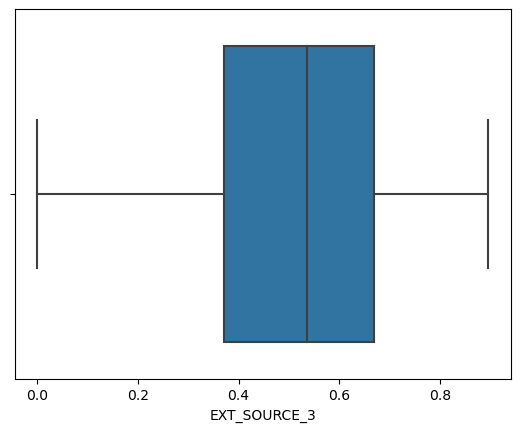

In [51]:
sns.boxplot(x=app_data.EXT_SOURCE_3)
plt.show()

### Last 6 columns has  13.5% of missing values which are third highest


In [52]:
# AMT_REQ_CREDIT_BUREAU_HOUR

In [53]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41519

In [54]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median()

0.0

In [55]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0]

0.0

In [56]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()

0.006402448193930645

In [57]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [60]:
# AMT_REQ_CREDIT_DAY

In [61]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [62]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mean()

0.0070002105326475985

In [63]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].median()

0.0

In [64]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

### AMT_REQ_CREDIT_BUREAU_WEEK:

In [65]:
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [66]:
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median()

0.0

In [67]:
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [68]:
# there is not much difference in mean,median and mode

#### AMT_REQ_CREDIT_BUREAU_MON

In [69]:
app_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [70]:
app_data['AMT_REQ_CREDIT_BUREAU_MON'].median()

0.0

In [71]:
app_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [72]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].median()

0.0

In [73]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [74]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [75]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

1.0

In [76]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

## Columns with less than 1% missing values:

### AMT_ANNUITY

In [77]:
app_data[app_data['AMT_ANNUITY'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

In [78]:
app_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [76]:
app_data['AMT_ANNUITY'].median()

24903.0

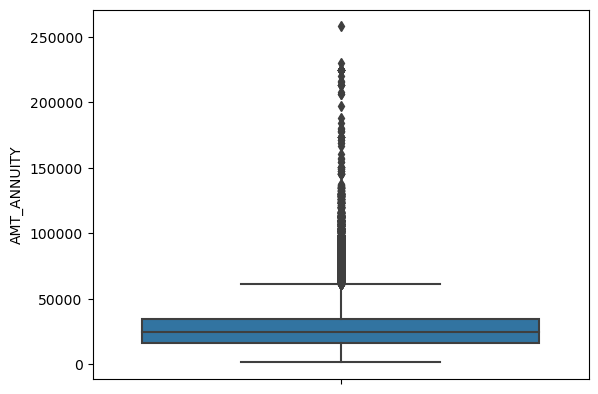

In [79]:
sns.boxplot(y=app_data.AMT_ANNUITY)
plt.show()

### AMT_GOODS_PRICE:


In [80]:
app_data['AMT_GOODS_PRICE'].isnull().sum()

278

In [81]:
app_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [82]:
app_data.AMT_GOODS_PRICE.median()

450000.0

In [83]:
filtered_data = app_data[app_data['AMT_GOODS_PRICE'].isnull()]
value_counts = filtered_data['NAME_CONTRACT_TYPE'].value_counts()
print(value_counts)

NAME_CONTRACT_TYPE
Revolving loans    278
Name: count, dtype: int64


### <span style='color:blue'> Observation
     1. All the null values in AMT_GOODS_PRICE col corresponds to 'Revolving loans' category of NAME_CONTRACT_TYPE col.

In [84]:
app_data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [85]:
app_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [86]:
app_data.CNT_FAM_MEMBERS.median()

2.0

In [87]:
app_data.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [88]:
app_data.EXT_SOURCE_2.median()

0.5659614260608526

In [89]:
app_data.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [90]:
app_data.OBS_30_CNT_SOCIAL_CIRCLE.median()

0.0

In [91]:
app_data.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [92]:
app_data.OBS_60_CNT_SOCIAL_CIRCLE.median()

0.0

In [93]:
app_data.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [94]:
app_data.DAYS_LAST_PHONE_CHANGE.median()

-757.0

In [95]:
app_data.DAYS_LAST_PHONE_CHANGE.mean()

-962.8587883320868

# <span style='color:red'> Previous Application.

In [96]:
# percentage nulls values:
prev_appli.isnull().mean() *100


SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [97]:
# Dropping colomns more than 40% mmissing values
percent =100 * prev_appli.isnull().mean()
prev_appli = prev_appli[prev_appli.columns[percent<= 40]]
prev_appli.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [98]:
prev_appli.shape

(1670214, 26)

In [99]:
nullprecent1 = prev_appli.isnull().mean() * 100
null_col_in_prev_appli = nullprecent1[nullprecent1 !=0]
print(null_col_in_prev_appli)
print('The number of columns having missing values are: ', len(null_col_in_prev_appli))
print('The number of non null columns are: ', prev_appli.shape[1]-len(null_col_in_prev_appli))

AMT_ANNUITY            22.286665
AMT_CREDIT              0.000060
AMT_GOODS_PRICE        23.081773
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
dtype: float64
The number of columns having missing values are:  5
The number of non null columns are:  21


In [100]:
prev_appli.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [101]:
prev_appli.AMT_ANNUITY.median()

11250.0

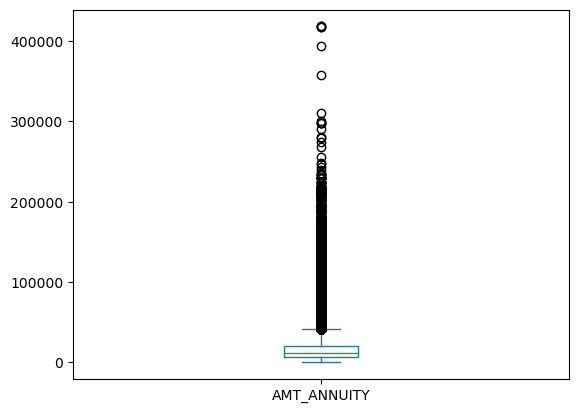

In [102]:
prev_appli.AMT_ANNUITY.plot.box()
plt.show()

## <span style='color:blue'> Observation:
    AMT_ANNUITY col has outliers so it dont have normalised distribution. therefore values cannot be replced by mean.

In [103]:
prev_appli['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [104]:
prev_appli['AMT_CREDIT'].median()

80541.0

In [105]:
prev_appli.AMT_CREDIT.mean()

196114.0212179794

In [106]:
prev_appli.AMT_CREDIT.std()

318574.61654586776

In [107]:
prev_appli.AMT_GOODS_PRICE.median()

112320.0

In [108]:
prev_appli.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [109]:
prev_appli.CNT_PAYMENT.median()

12.0

In [110]:
prev_appli.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [111]:
prev_appli.PRODUCT_COMBINATION.describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [112]:
prev_appli.PRODUCT_COMBINATION.mode()[0]

'Cash'

## <span style='color:red'> Checking our column Details and Correction of Datatype and Standardisation:

In [113]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [114]:
app_data.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

## <span style='color:blue'> Observation:
    1. DAYS_BIRTH,DAYS_EMPLOYED, DAYS_ID_PUBLISH are integer datatype and have negative values and should be converted into
       appropiate data types.
    2. DAYS_BIRTH,DAYS_EMPLOYED looks like necessary column for analyst at first view.
    3. DAYS_REGISTRATION is float type. it should be converted to appropriate data type.
    4. negative signs sholud be converted into postive number.
    5. CNT_FAM_MEMBERS is float, it should be integer

In [115]:
app_data['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [116]:
app_data['AGE'] = -app_data['DAYS_BIRTH'] /365

In [117]:
app_data.AGE.head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: AGE, dtype: float64

In [118]:
app_data.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [119]:
app_data['Years_employed'] = -app_data['DAYS_EMPLOYED']/365
app_data['Years_employed'] = app_data['Years_employed'].abs()

In [120]:
app_data['Years_employed'].describe()
# outliers presnt

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: Years_employed, dtype: float64

In [121]:
app_data['CNT_FAM_MEMBERS'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., nan, 14.,
       12., 20., 15., 16., 11.])

In [122]:
app_data[app_data['CNT_FAM_MEMBERS']=='nan'].shape

(0, 76)

In [123]:
app_data['CNT_FAM_MEMBERS'].isnull().sum()

2

In [124]:
app_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [125]:
mod1 = app_data['CNT_FAM_MEMBERS'].mode()[0]
mod1

2.0

In [126]:
app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].fillna(mod1)

In [127]:
app_data['CNT_FAM_MEMBERS'] = app_data["CNT_FAM_MEMBERS"].astype(int)

<Axes: >

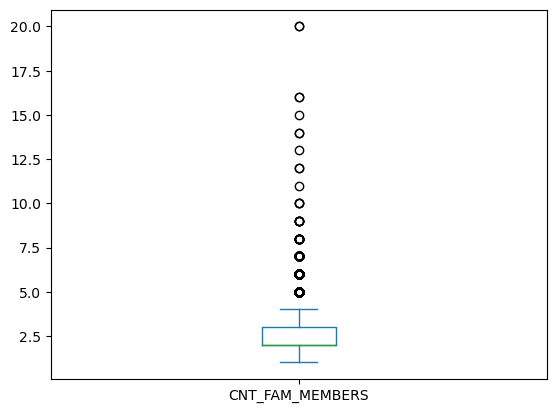

In [129]:
app_data.CNT_FAM_MEMBERS.plot.box()

In [130]:
## AMT_ANNUITY:
app_data['AMT_ANNUITY'].isnull().sum()

12

In [131]:
app_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [132]:
mod2 = app_data.AMT_ANNUITY.median()
mod2

24903.0

In [133]:
# replacing missing values with median:
app_data['AMT_ANNUITY'] = app_data['AMT_ANNUITY'].fillna(mod2)

## <span style='color:red'> Identifying and Handling outliers:


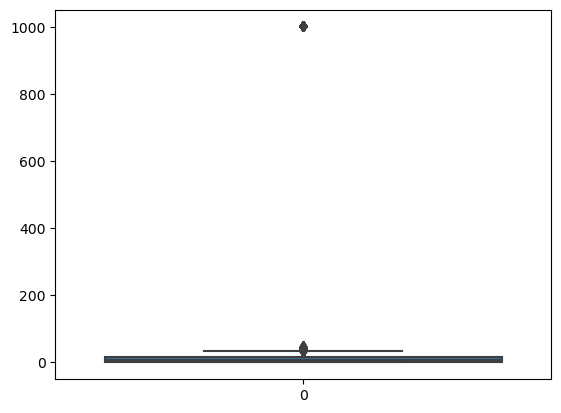

In [134]:
# Years_employed:
sns.boxplot(app_data.Years_employed)
plt.show()

In [135]:
# Age cannot be 1000 years

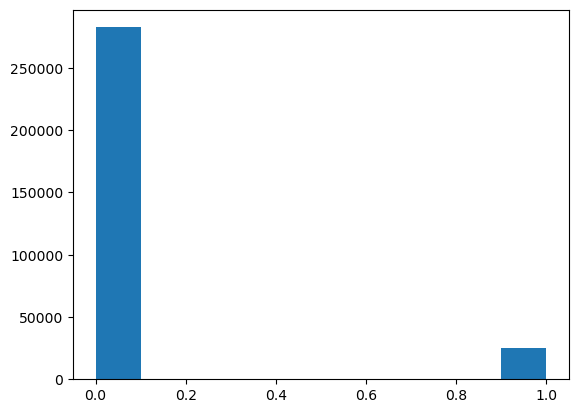

In [136]:
#  Target:
plt.hist(app_data.TARGET)
plt.show()

In [137]:
app_data.TARGET.describe()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

In [138]:
# no outliers 

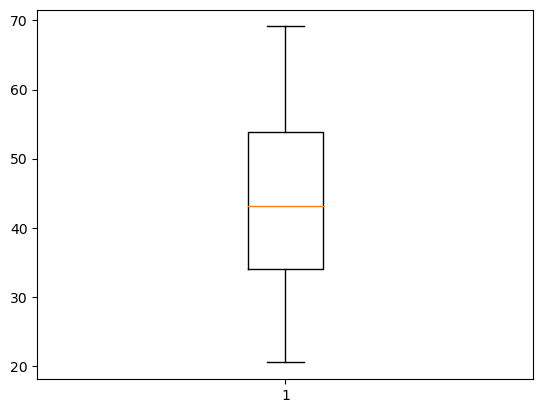

In [139]:
# AGE
plt.boxplot(app_data.AGE)
plt.show()


In [140]:
# NO outliers

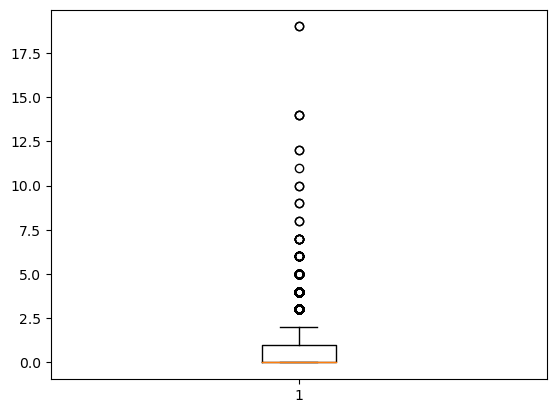

In [141]:
# CNT_CHILDREN
plt.boxplot(app_data['CNT_CHILDREN'])
plt.show()

In [142]:
# outliers present

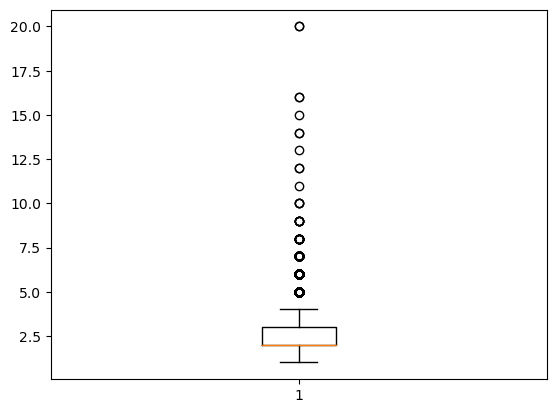

In [143]:
plt.boxplot(app_data['CNT_FAM_MEMBERS'])
plt.show()

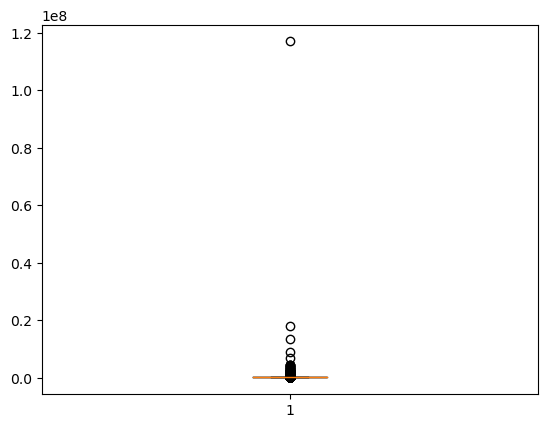

In [144]:
plt.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()

In [145]:
app_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

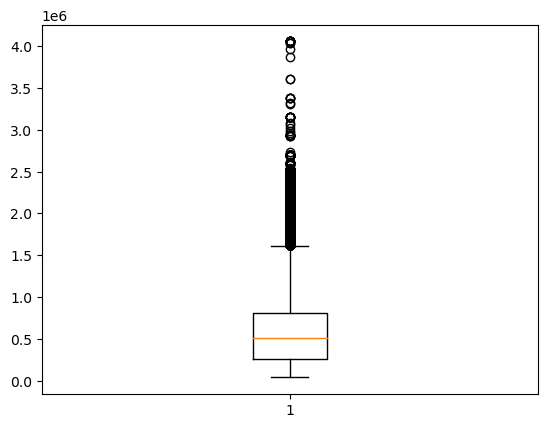

In [146]:
plt.boxplot(app_data['AMT_CREDIT'])
plt.show()

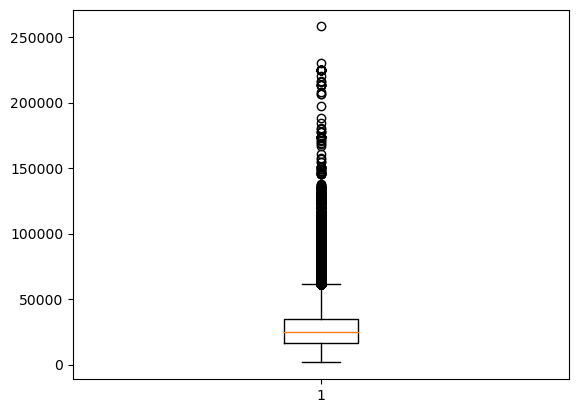

In [147]:
plt.boxplot(app_data['AMT_ANNUITY'])
plt.show()

## Binning:

In [148]:
app_data.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

### NAME_TYPE_SUITE

In [149]:
app_data['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [150]:
# mapping these values to a new well defined categories:
app_data['relation_type'] = app_data.NAME_TYPE_SUITE.apply(lambda x:'Family' if x in ['Family','Spouse, partner','Children'] 
                                                           else('Unacompanied' if x=='Unaccompanied' else 'Other'))

In [151]:
app_data.relation_type.value_counts()

relation_type
Unacompanied    248526
Family           54786
Other             4199
Name: count, dtype: int64

In [152]:
app_data.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

### AGE:`

In [153]:
# Creating bins and lables for age groups:
age_bin =[0,18,30,40,50,60,70,80,90,100]
age_labels = ['0-18','18-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']

# Creating New age group column:
app_data['Age_grp'] = pd.cut(app_data.AGE, bins=age_bin, labels=age_labels)
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [154]:
print(app_data.Age_grp.value_counts())

Age_grp
30-40     82308
40-50     76541
50-60     68062
18-30     45021
60-70     35579
0-18          0
70-80         0
80-90         0
90-100        0
Name: count, dtype: int64


### AMT_CREDIT

In [155]:
app_data.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

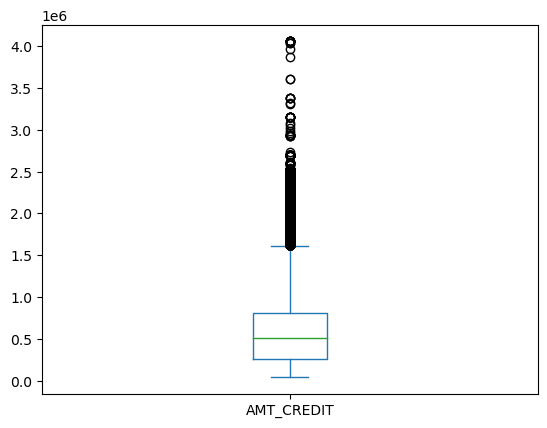

In [156]:
app_data.AMT_CREDIT.plot.box()
plt.show()

In [157]:
## creating bins for credit col and storing in new col called CREDIT_bins:
credit_bin = [45000,100000,250000,500000,750000,1000000,2000000,3000000,4000000, float('inf')]
credit_lables= ['45-100k','1-2.5L','2.5-5L','5-7.5L','7.5-10L','10-20L','20-30L','30-40L','40L+']

# Creating col
app_data['Credit_bins'] = pd.cut(app_data.AMT_CREDIT, bins=credit_bin, labels=credit_lables)
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [158]:
app_data.Credit_bins.value_counts()

Credit_bins
2.5-5L     90135
5-7.5L     65094
1-2.5L     53194
10-20L     47956
7.5-10L    43099
45-100k     5774
20-30L      1997
30-40L        22
40L+          10
Name: count, dtype: int64

### AMT_GOODS_PRICE:

In [159]:
app_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [160]:
# Creating goods bin and storing  in a new column
goods_bin = [40000,100000,250000,500000,750000,1000000,1500000,2000000,3000000,4000000, float('inf')]
goods_labels = ['40-100k','1-2.5L','2.5-5L','5-7.5L','7.5-10L','10-15L','15-20L','20-30L','30-40L','40L+']

app_data['GOODS_bins'] = pd.cut(app_data.AMT_GOODS_PRICE, bins=goods_bin,labels=goods_labels)

In [161]:
app_data.GOODS_bins.value_counts()

GOODS_bins
2.5-5L     97727
1-2.5L     76182
5-7.5L     57883
7.5-10L    32613
10-15L     27205
40-100k     8709
15-20L      5821
20-30L      1063
30-40L        22
40L+           8
Name: count, dtype: int64

### AMT_ANNUITY

In [162]:
app_data.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [163]:
annuity_bins =[1600,5000,10000,50000,100000,150000,200000, float('inf')]
annuity_lables = ['1.6-5K','5-10K','10-50K','50-100K','100-150K','150-200K','200K+']

app_data['Annuity']  = pd.cut(app_data.AMT_ANNUITY, bins=annuity_bins, labels=annuity_lables)


In [164]:
app_data.Annuity.value_counts()

Annuity
10-50K      262931
5-10K        22142
50-100K      20792
1.6-5K        1141
100-150K       437
200K+           36
150-200K        32
Name: count, dtype: int64

## <span style='color:red'> Dropping Unnecessary Columns.

In [165]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [166]:
# copying column names from above output to drop
drop_cols= ['DAYS_BIRTH','AGE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
app_data.drop(columns=drop_cols, inplace=True)

cols_to_drop = ['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
app_data.drop(columns=cols_to_drop, inplace=True)

In [167]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801        Laborers                1   
1                    0.003541      Core staff                2   
2                    0.010032        Laborers                1   
3                    0.008019        Laborers                2   
4                    0.028663      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0   

### CODE_GENDER col:

In [168]:
app_data.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [169]:
app_data.CODE_GENDER.replace('XNA','F', inplace=True)
app_data.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

### FLAG_OWN_CAR 

In [170]:
app_data.FLAG_OWN_CAR.value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

In [171]:
app_data.FLAG_OWN_CAR.replace({'Y':1,'N':0}, inplace=True)
app_data.FLAG_OWN_CAR.value_counts()

FLAG_OWN_CAR
0    202924
1    104587
Name: count, dtype: int64

In [172]:
# shape of app_data:
app_data.shape

(307511, 50)

## <span style='color:red'> 5. Data Imbalance and correlation.

In [173]:
app_data.TARGET.value_counts(normalize=True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

In [174]:
imbalance_ratio = 8.072882/91.927118 * 100
imbalance_ratio


8.781828665617473

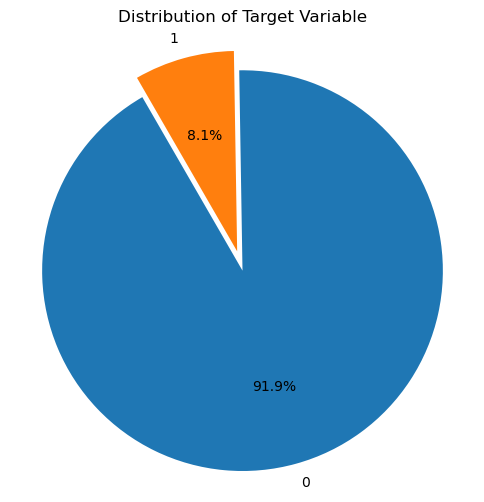

In [175]:
# pie chart of target
target_counts = app_data['TARGET'].value_counts()
explode= (0.10,0)

plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=120, explode=explode, shadow=False)

plt.axis('equal')

plt.title('Distribution of Target Variable')

plt.show()

 ### Repayers table numerical and categorical:
    

In [176]:
df_0_repayers = app_data[app_data['TARGET'] == 0]

### Defaulters:

In [177]:
df_1_defaulters = app_data[app_data['TARGET'] == 1]

## Correlation between variables:

## df_1_defaulters

In [178]:
app_data.dtypes.value_counts()

float64     19
int64       13
object      12
int32        1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

### Segregating Numerical and num-categorical data from app_data:

In [180]:
# creating numeric variables
num_var = app_data.select_dtypes(include=['float64','int64','int32']).columns

num_cat_var = app_data.select_dtypes(include= ['float64','int64','int32','category']).columns

len(num_var)

33

In [181]:
num_categorical_data = app_data[num_var]

In [182]:
categorical_var = app_data.select_dtypes(include= ['category']).columns

In [183]:
categorical_data = app_data[categorical_var]

### Dividing numerical into defaulters and non-defauters

In [184]:
numerical_data = app_data[num_var]
defaulters = numerical_data[numerical_data['TARGET']==1].drop(['TARGET'], axis=1)

In [185]:
numerical_data.shape

(307511, 33)

In [186]:
non_defaulters = numerical_data[numerical_data['TARGET']==0].drop(['TARGET'], axis=1)

In [187]:
defaulters_corr = defaulters.corr()
defaulters_corr_unstack = defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape), k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0':'var1','level_2':'var2', 0:'corr'})

In [188]:
defaulters_corr_unstack['corr'] = abs(defaulters_corr_unstack['corr'])
defaulters_corr_unstack.sort_values(by=['corr'],ascending=False).head(10)

var1                     level_1      corr
724     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE  0.998269
196              AMT_GOODS_PRICE                  AMT_CREDIT  0.983103
329  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT  0.956637
258              CNT_FAM_MEMBERS                CNT_CHILDREN  0.885484
757     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE  0.868994
461  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION  0.847885
560      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY  0.778540
197              AMT_GOODS_PRICE                 AMT_ANNUITY  0.752699
164                  AMT_ANNUITY                  AMT_CREDIT  0.752195
428   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION  0.497937

## observations:
    1. OBS_60_CNT_SOCIAL_CIRCLE AND OBS_30_CNT_SOCIAL_CIRCLE are most highly correlated variables.

In [189]:
non_defaulters_corr = non_defaulters.corr()
non_defaulters_corr_unstack = non_defaulters_corr.where(np.triu(np.ones(non_defaulters_corr.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:'corr'})

In [190]:
non_defaulters_corr_unstack['corr'] = abs(non_defaulters_corr_unstack['corr'])
non_defaulters_corr_unstack.sort_values(by=['corr'],ascending=False).head(10)

var1                        var2      corr
724     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE  0.998508
196              AMT_GOODS_PRICE                  AMT_CREDIT  0.987250
329  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT  0.950149
258              CNT_FAM_MEMBERS                CNT_CHILDREN  0.878571
461  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION  0.861861
757     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE  0.859332
560      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY  0.830381
197              AMT_GOODS_PRICE                 AMT_ANNUITY  0.776674
164                  AMT_ANNUITY                  AMT_CREDIT  0.771297
295         REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE  0.539005

## observations:
    1. OBS_60_CNT_SOCIAL_CIRCLE AND OBS_30_CNT_SOCIAL_CIRCLE are most highly correlated variables.

### Plotting correlation matrix:

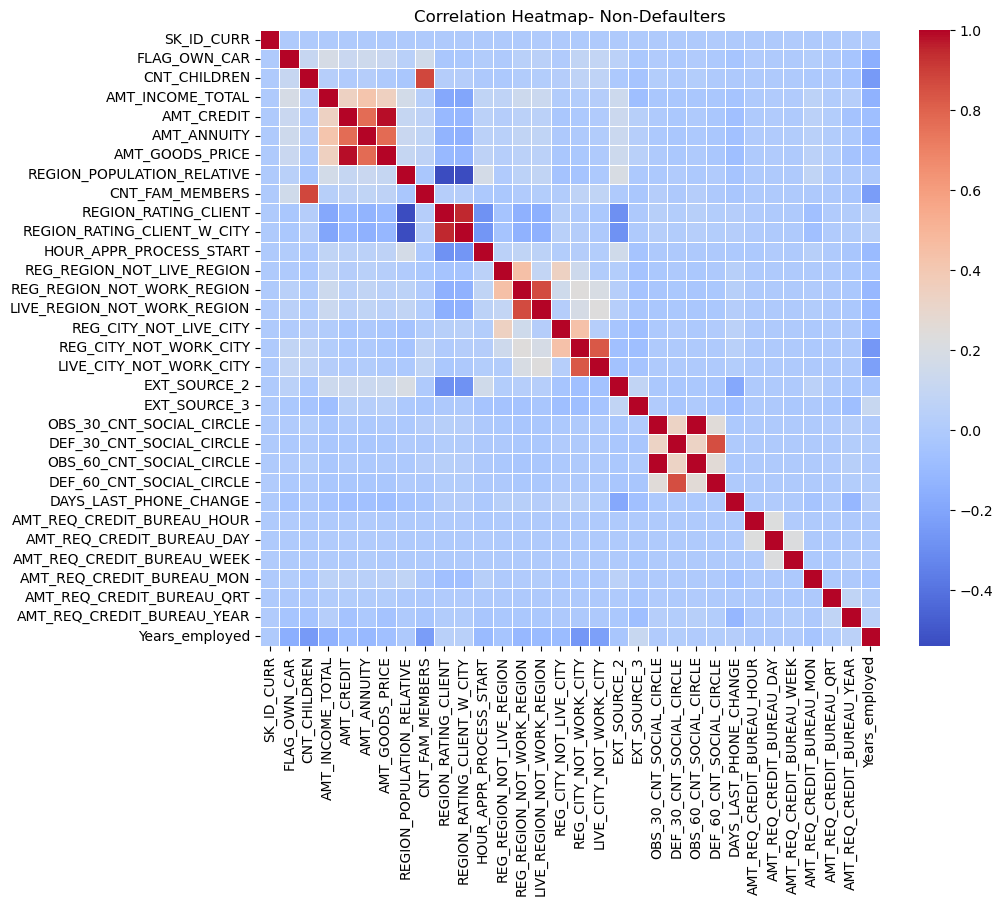

In [191]:
plt.figure(figsize=(10,8))

sns.heatmap(non_defaulters_corr, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap- Non-Defaulters')

plt.show()

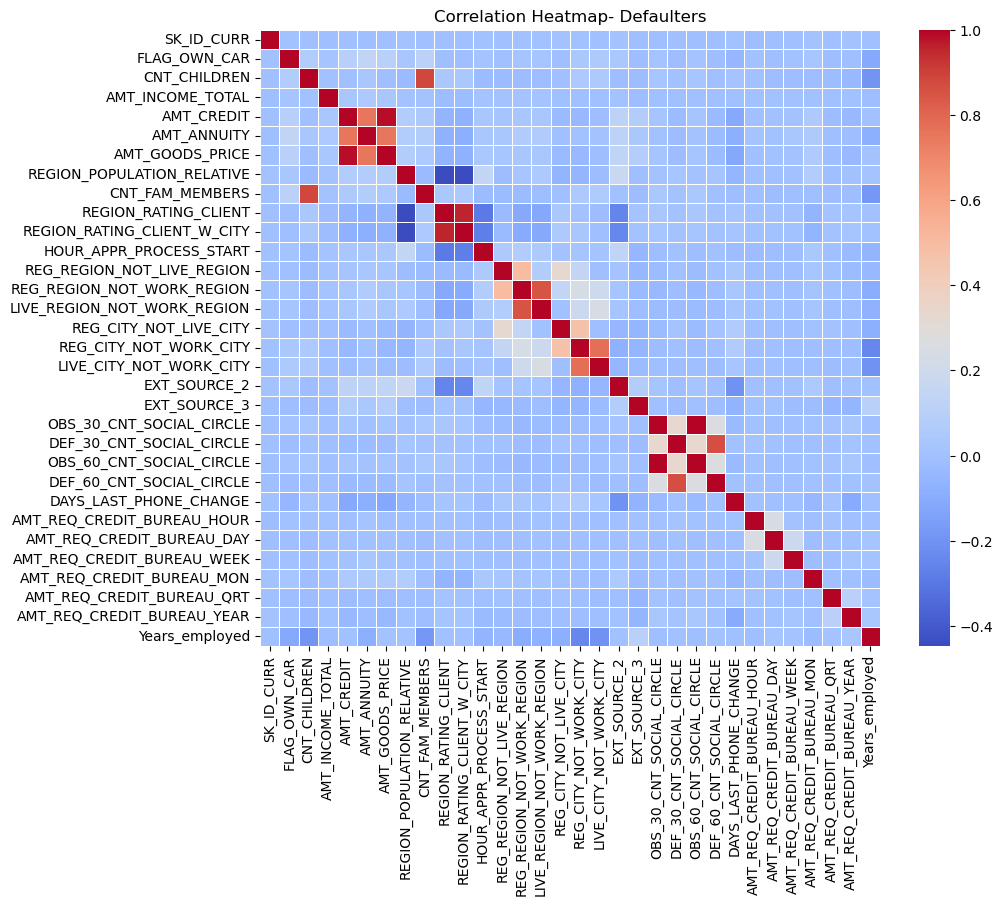

In [192]:
plt.figure(figsize=(10,8))

sns.heatmap(defaulters_corr, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap- Defaulters')

plt.show()

## <span style='color:red'> 6. Univariate Analysis
    Inspecting columns in numerical_data table.

In [193]:
numerical_data.shape

(307511, 33)

In [194]:
numerical_data.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'Years_employed'],
      dtype='object')

In [195]:
# segregating columns copying col names from above output 
numerical_col1 = ['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT']

numerical_col2 = ['REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE']

numerical_col3 = ['DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'Years_employed']

<Figure size 800x600 with 0 Axes>

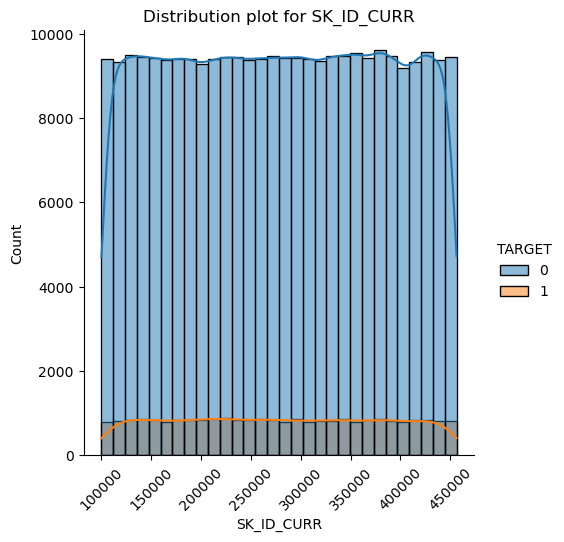

<Figure size 800x600 with 0 Axes>

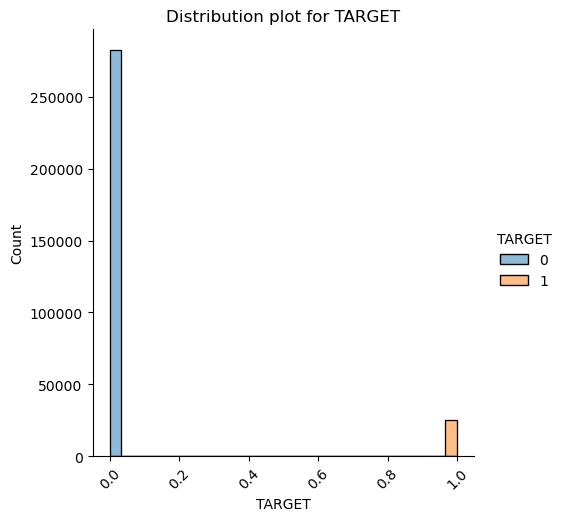

<Figure size 800x600 with 0 Axes>

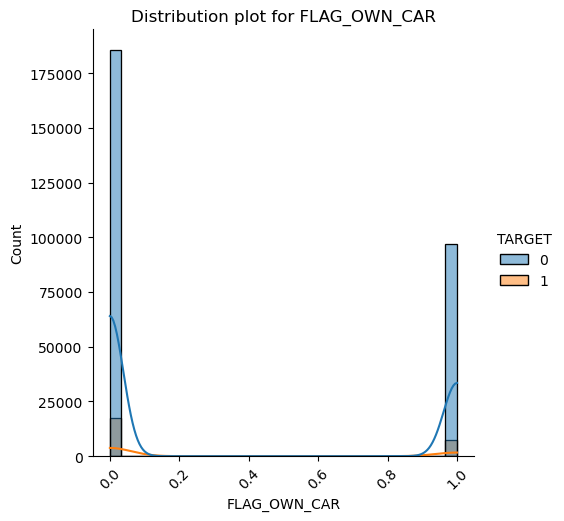

<Figure size 800x600 with 0 Axes>

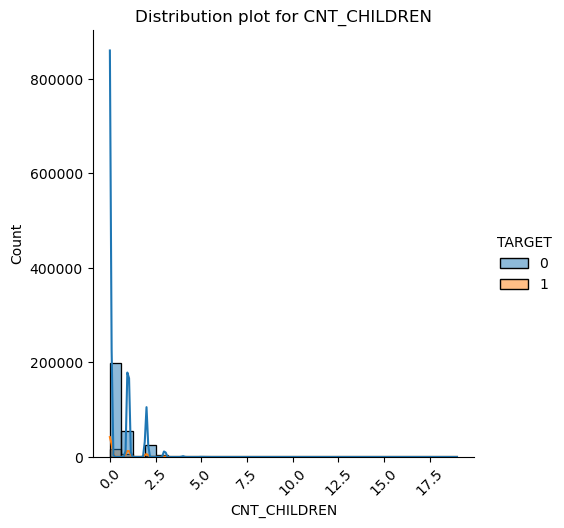

<Figure size 800x600 with 0 Axes>

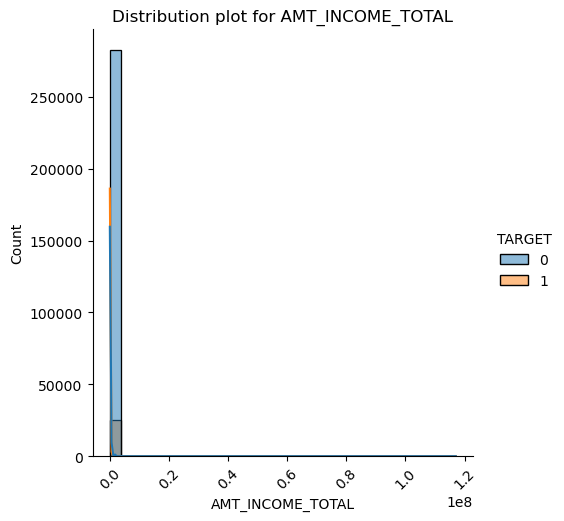

<Figure size 800x600 with 0 Axes>

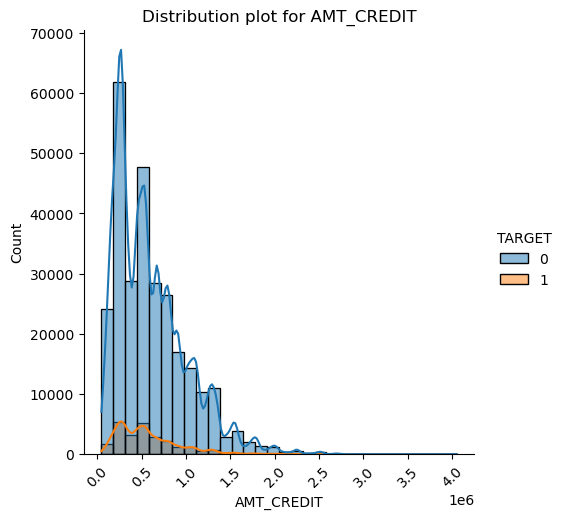

<Figure size 800x600 with 0 Axes>

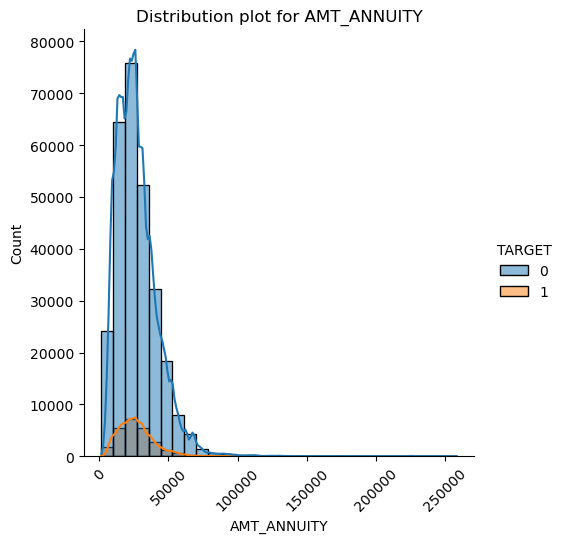

<Figure size 800x600 with 0 Axes>

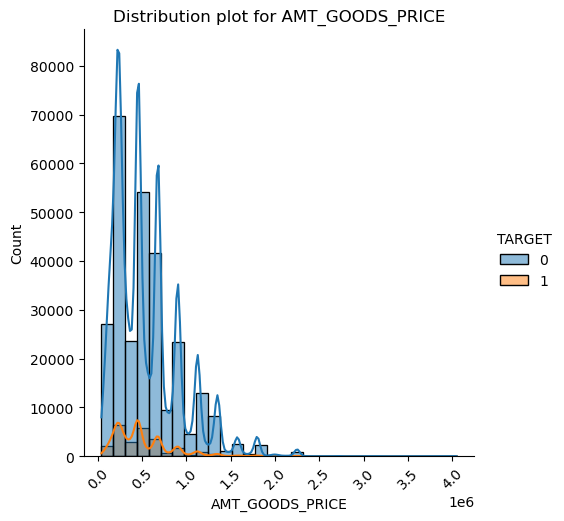

<Figure size 800x600 with 0 Axes>

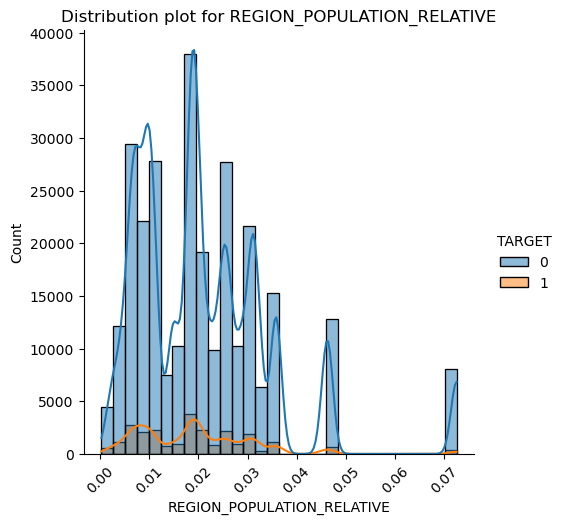

<Figure size 800x600 with 0 Axes>

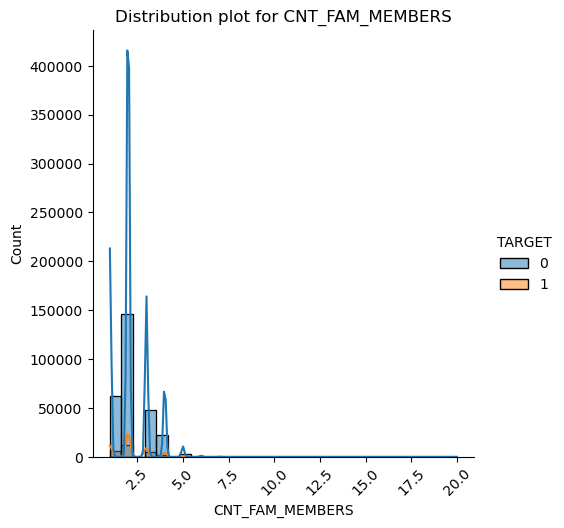

<Figure size 800x600 with 0 Axes>

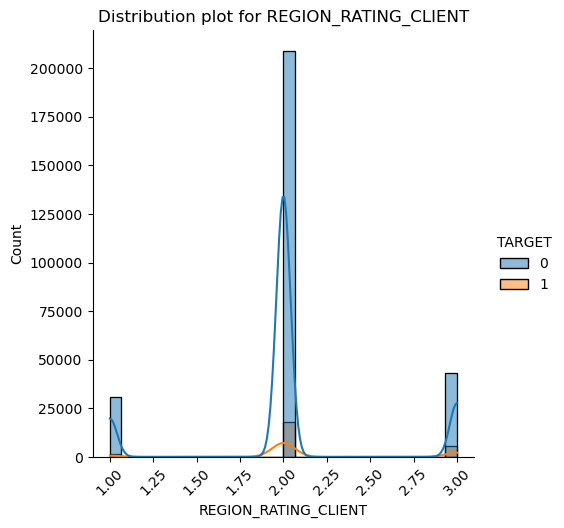

In [198]:
# plotting different cols in numerical col 
for column in numerical_col1:
    plt.figure(figsize=(8, 6))
    sns.displot(numerical_data, x=column, kde=True, bins=30, color='#158685', hue='TARGET')
    plt.title(f'Distribution plot for {column}')
    plt.xticks(rotation=45)
    plt.show()

<Figure size 800x600 with 0 Axes>

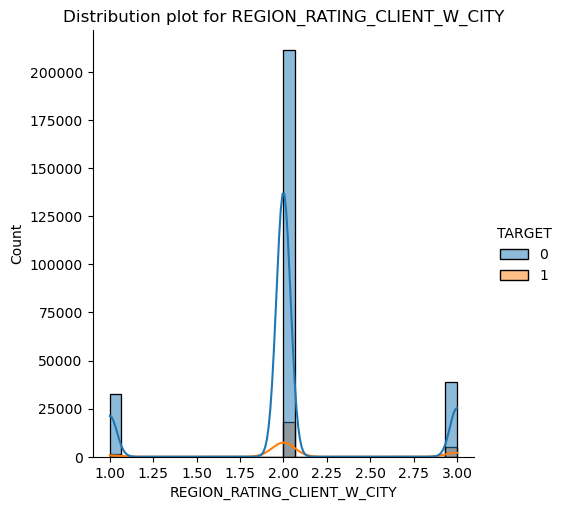

<Figure size 800x600 with 0 Axes>

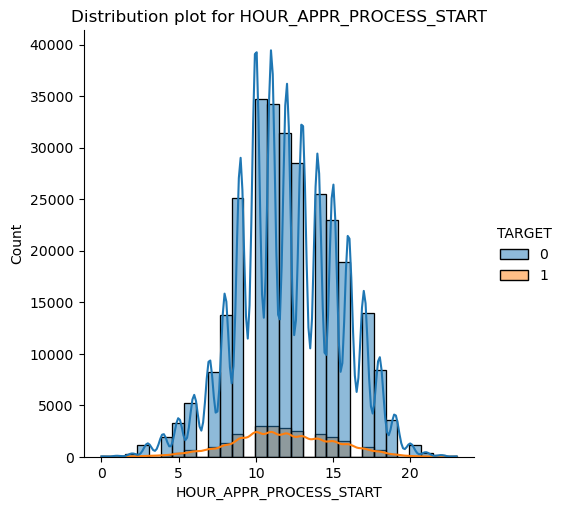

<Figure size 800x600 with 0 Axes>

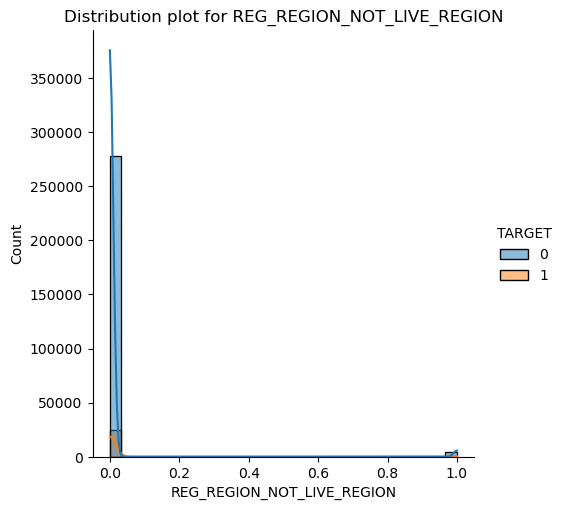

<Figure size 800x600 with 0 Axes>

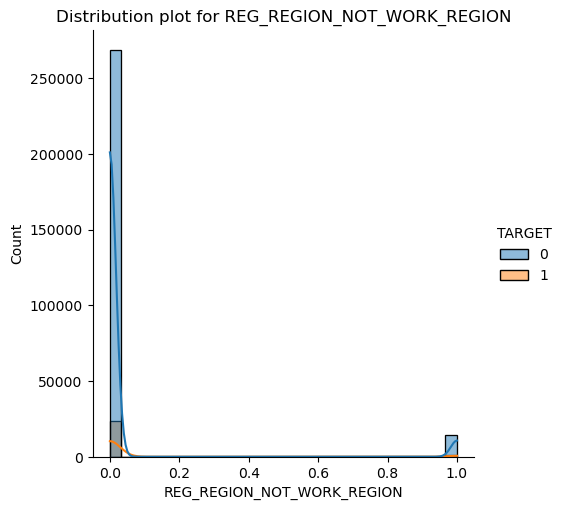

<Figure size 800x600 with 0 Axes>

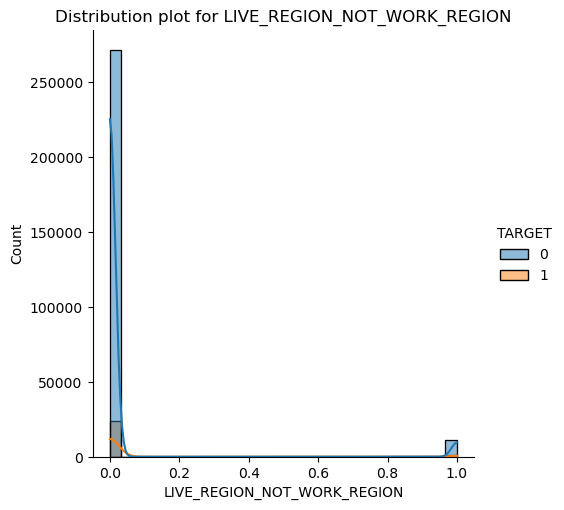

<Figure size 800x600 with 0 Axes>

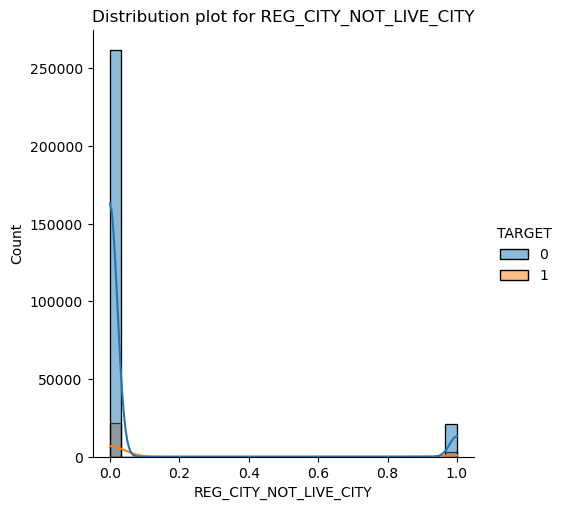

<Figure size 800x600 with 0 Axes>

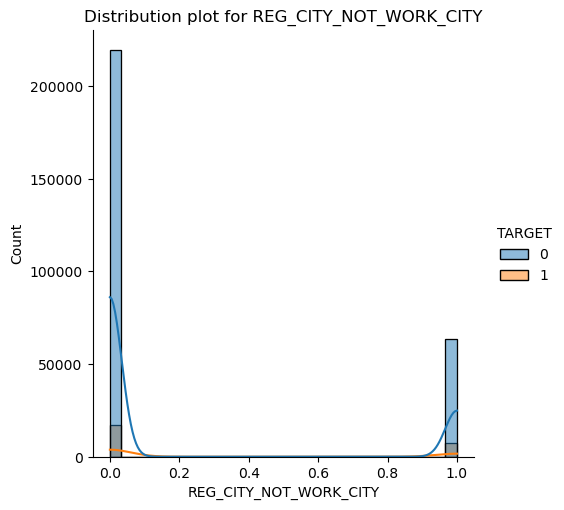

<Figure size 800x600 with 0 Axes>

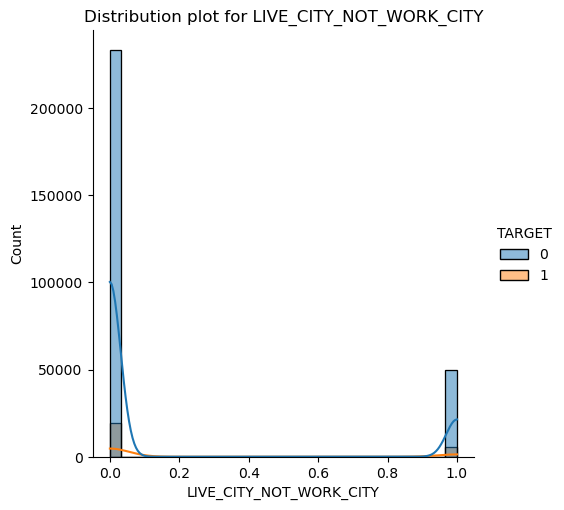

<Figure size 800x600 with 0 Axes>

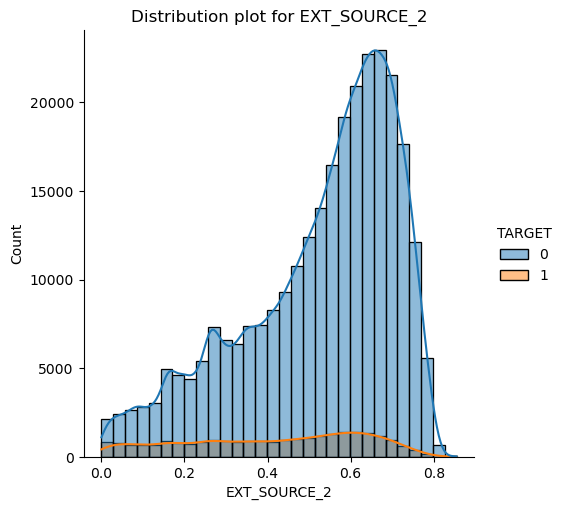

<Figure size 800x600 with 0 Axes>

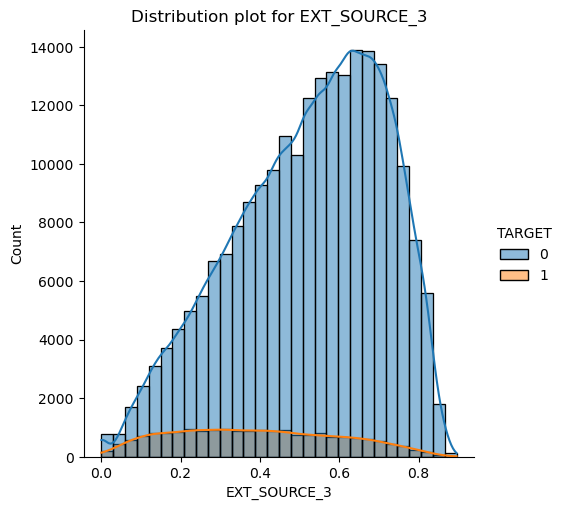

<Figure size 800x600 with 0 Axes>

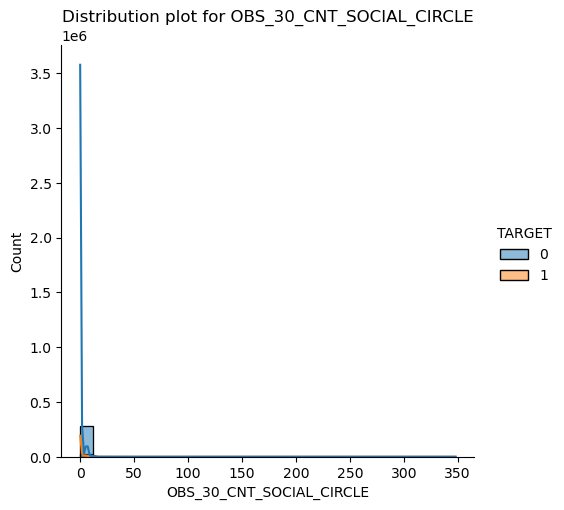

In [199]:
for column in numerical_col2:
    plt.figure(figsize=(8, 6))
    sns.displot(numerical_data, x=column, kde=True, bins=30, color='#158685', hue='TARGET')
    plt.title(f'Distribution plot for {column}')
    
    plt.show()

<Figure size 800x600 with 0 Axes>

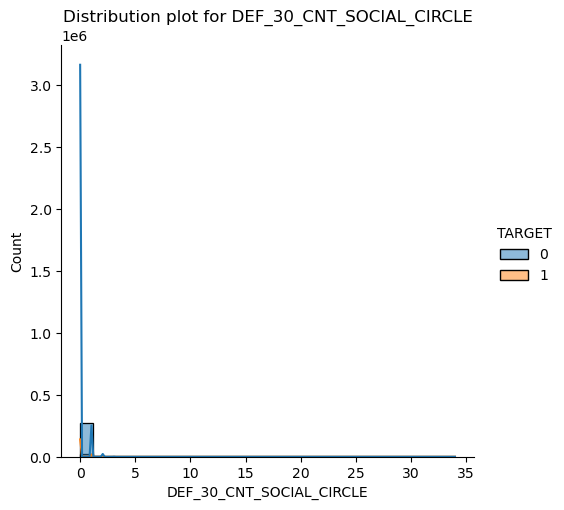

<Figure size 800x600 with 0 Axes>

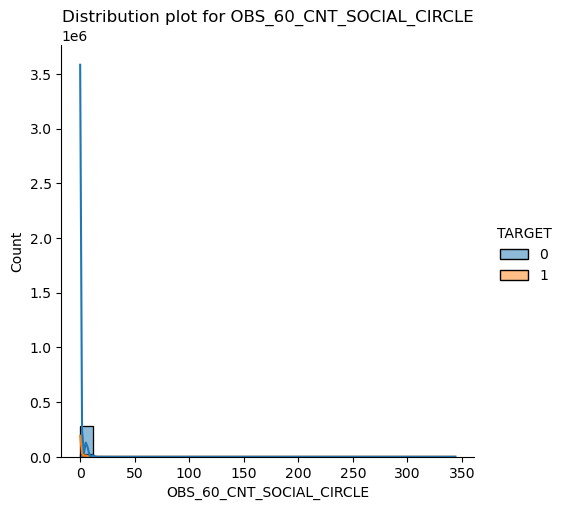

<Figure size 800x600 with 0 Axes>

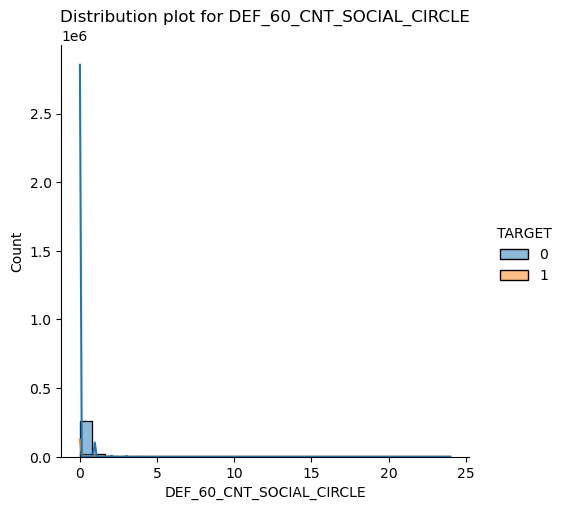

<Figure size 800x600 with 0 Axes>

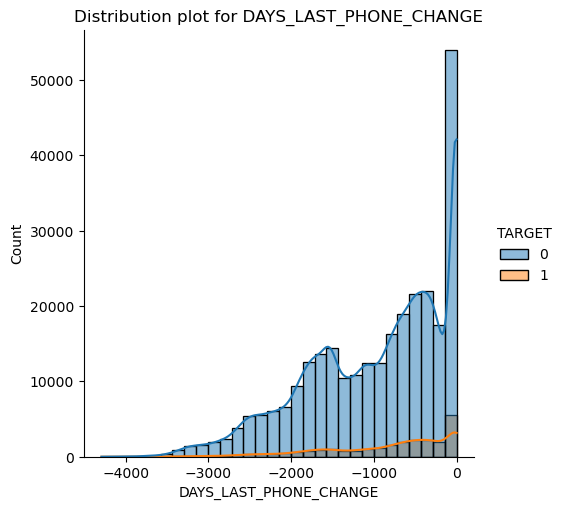

<Figure size 800x600 with 0 Axes>

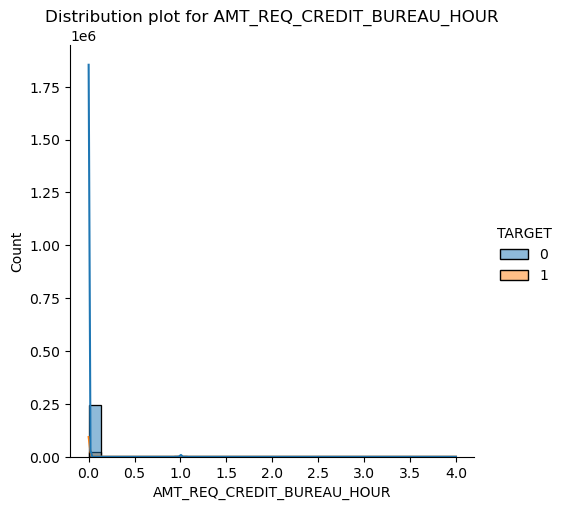

<Figure size 800x600 with 0 Axes>

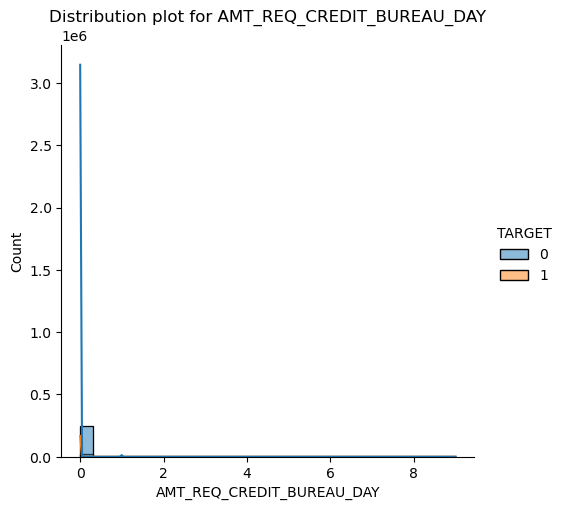

<Figure size 800x600 with 0 Axes>

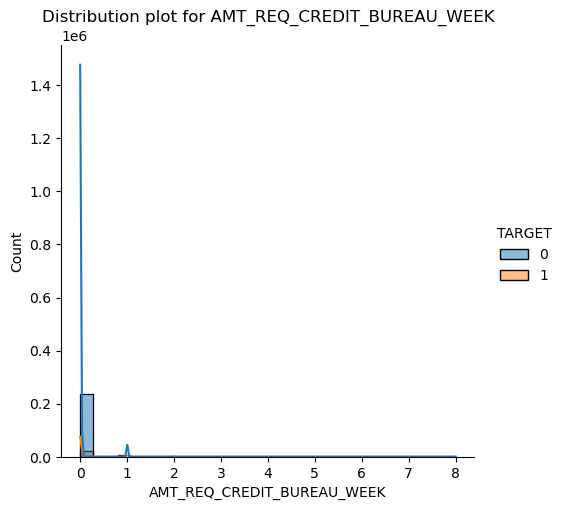

<Figure size 800x600 with 0 Axes>

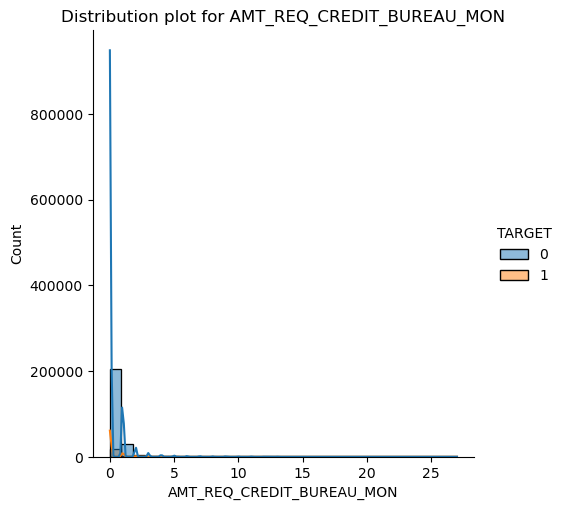

<Figure size 800x600 with 0 Axes>

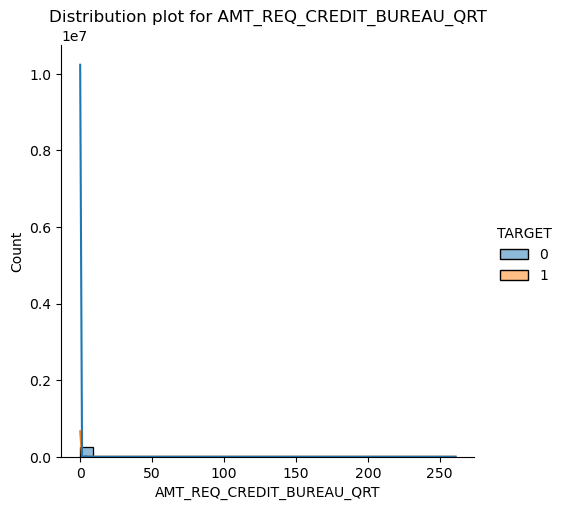

<Figure size 800x600 with 0 Axes>

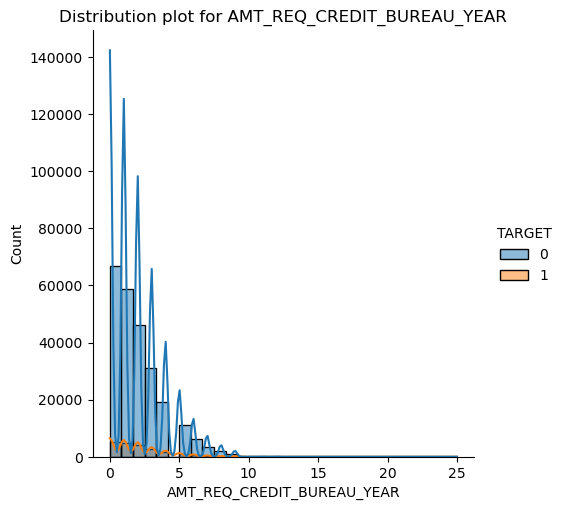

<Figure size 800x600 with 0 Axes>

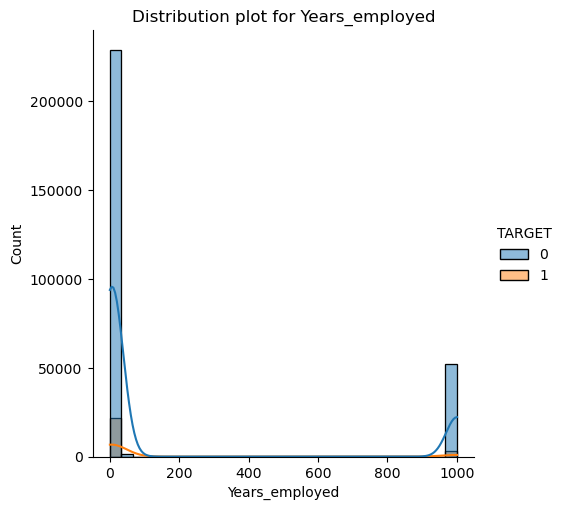

In [192]:
for column in numerical_col3:
    plt.figure(figsize=(8, 6))
    sns.displot(numerical_data, x=column, kde=True, bins=30, color='#158685', hue='TARGET')
    plt.title(f'Distribution plot for {column}')
    plt.show()

# <span style="color:blue"> Analysis -
    1. Most of the customers who have taken the loan and not defaulted has annual income between 0-10 crore.
    2. Most loans were given for price range of 0-5 lakhs of goods price. 
    3. Most loans were given for credit amount of 0-2 lakhs.
    4. Most customers are paying annuity between 0 to 50,000 rupees
    5. Most customers applying for loans have 0 childrens.
    6. Most clients have no cars who are applying for loans.
    7. Family members → client with upto 3 family members applies more for loan.
    8. Client with regions of population density between .01 to .03 applies more for loans.m


## Categorical Data:


In [200]:
categorical_data.columns

Index(['Income_bin', 'Age_grp', 'Credit_bins', 'GOODS_bins', 'Annuity'], dtype='object')

In [201]:
categorical_columns= ['Income_bin', 'Age_grp', 'Credit_bins', 'GOODS_bins', 'Annuity']

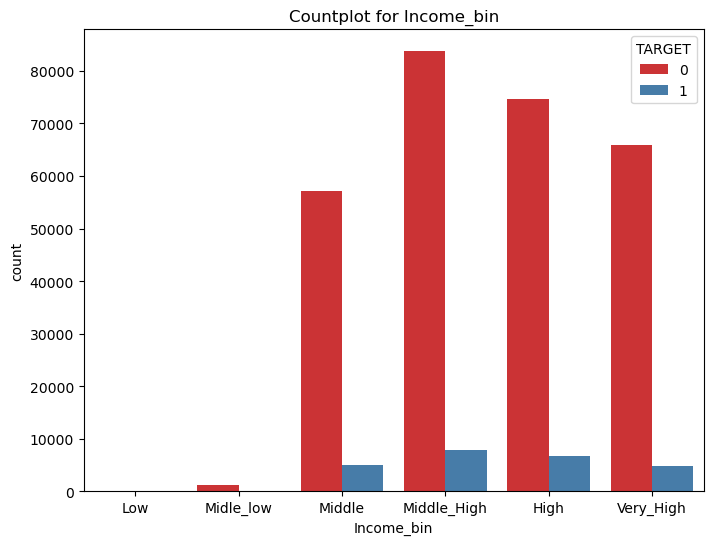

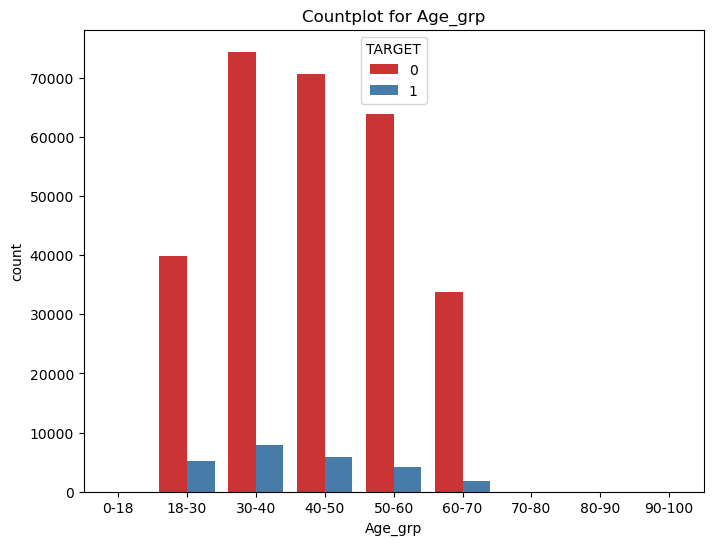

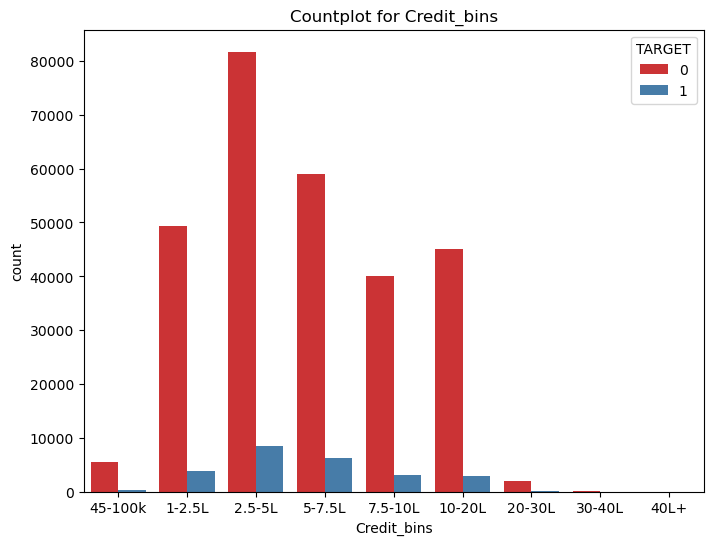

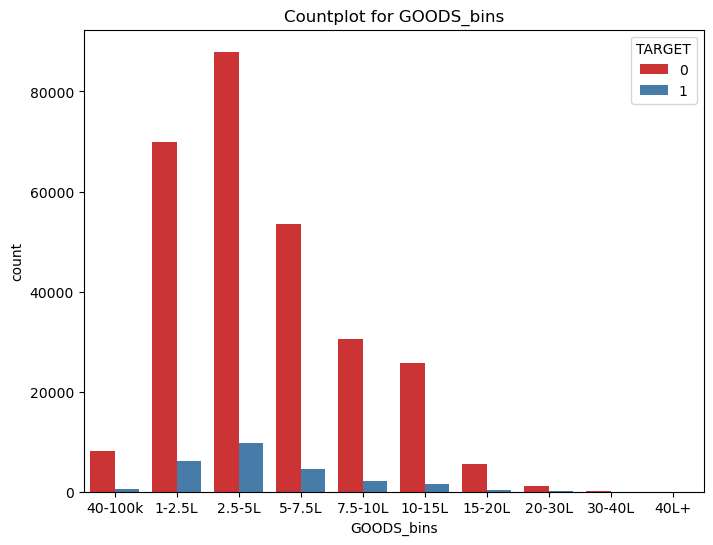

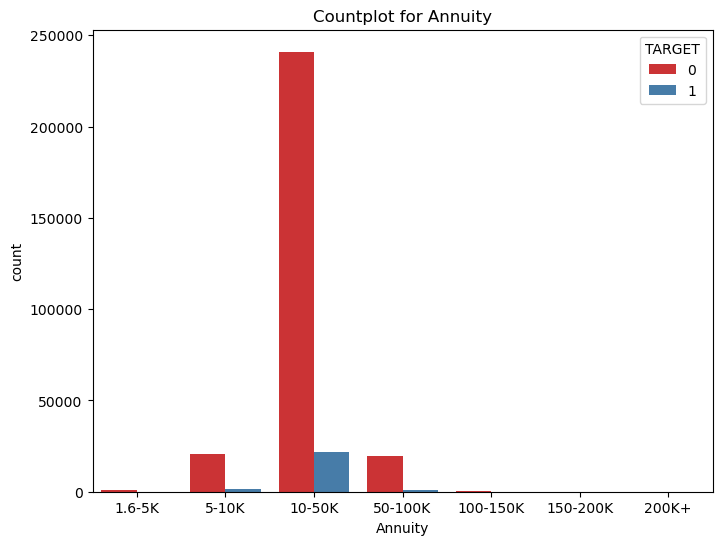

In [203]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data= categorical_data, hue= numerical_data['TARGET'], palette='Set1')
    plt.title(f'Countplot for {column}')
    plt.show()

# <span style="color:blue"> Analysis -
    1.	Most clients are from middle-high income group applying for loans.
    2. People aged 30-40 years are highest to apply for loans.
    3. Emplyers with 5-10 years of employment are highest applicant for applying for loans followed by employers of 1-3 years of employment.
    4. Most loans are given in range of 2.5-5 lakhs.
    5. Goods prized between 2.5-5 lakhs stood first for credit applications.
    6. Most annuity is paid for price range of 10-50 thousands.


In [204]:
num_categorical_data.columns.shape

(33,)

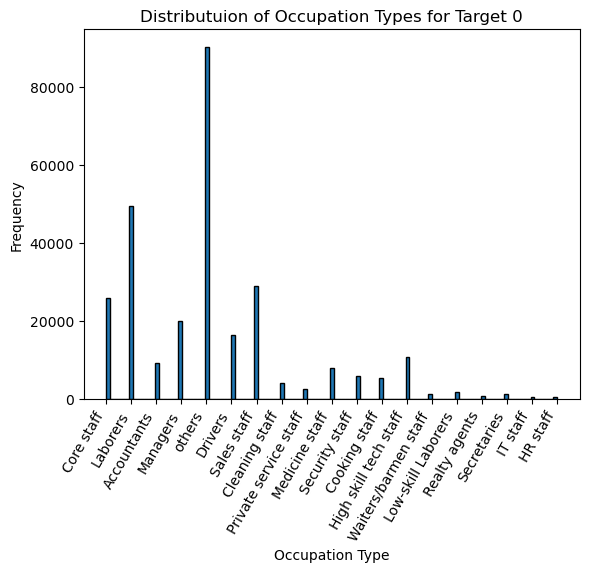

In [205]:
# Histograms for OCCUPATION_TYPE col wrt to taget0 variable
plt.hist(df_0_repayers['OCCUPATION_TYPE'], bins='auto', edgecolor= 'black')
plt.xticks(rotation=60, ha='right')

plt.xlabel('Occupation Type')
plt.ylabel('Frequency')
plt.title('Distributuion of Occupation Types for Target 0')
plt.show()

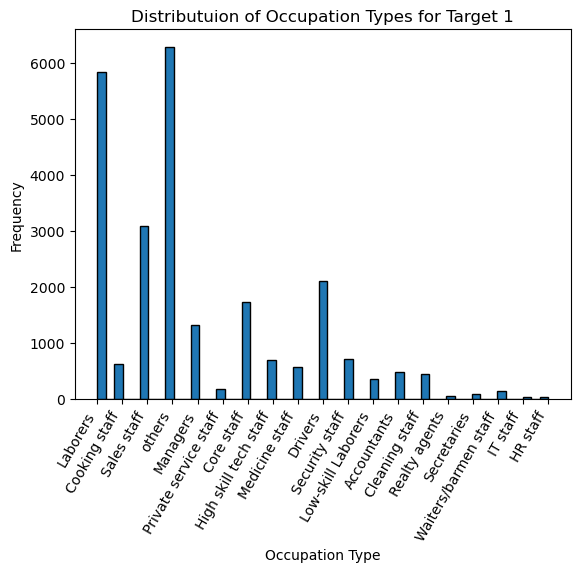

In [198]:
# plotting for occupation type wrt target 1 varible:
plt.hist(df_1_defaulters['OCCUPATION_TYPE'], bins='auto', edgecolor= 'black')
plt.xticks(rotation=60, ha='right')

plt.xlabel('Occupation Type')
plt.ylabel('Frequency')
plt.title('Distributuion of Occupation Types for Target 1')
plt.show()

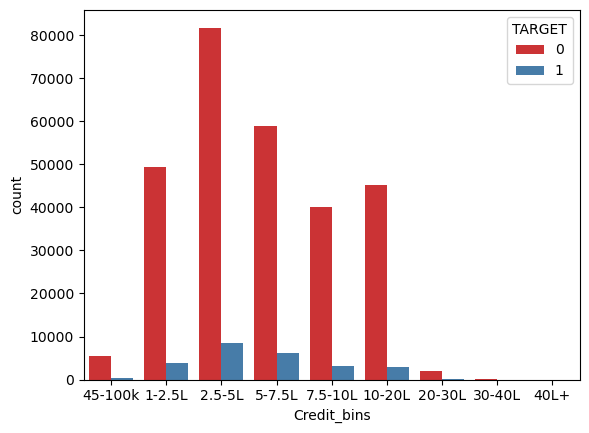

In [209]:
sns.countplot(x= app_data.Credit_bins,hue=numerical_data.TARGET,palette='Set1')
plt.show()

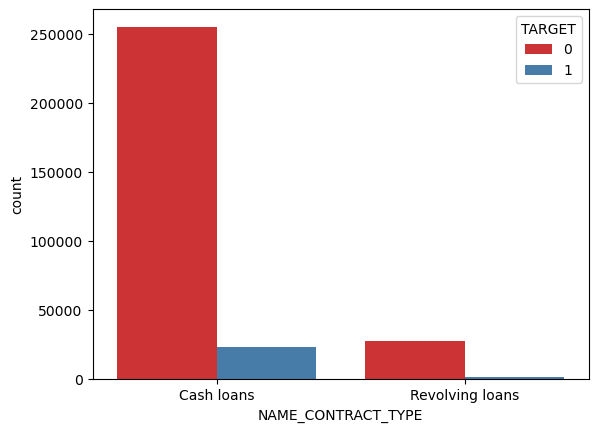

In [212]:
sns.countplot(x=app_data.NAME_CONTRACT_TYPE, hue=numerical_data.TARGET, palette='Set1')
plt.show()

In [214]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_C

## <span style='color:red'> 7.Bivariate Analysis:

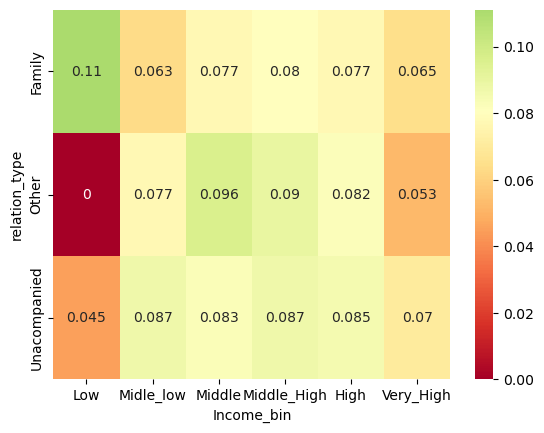

In [218]:
res = pd.pivot_table(data=app_data, index='relation_type', columns='Income_bin', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn', center= 0.08072)
plt.show()

In [219]:
numerical_data.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'Years_employed'],
      dtype='object')

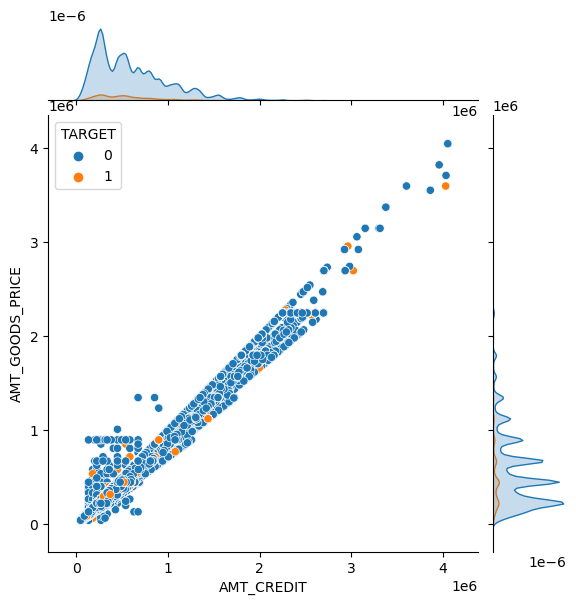

In [221]:
sns.jointplot(data=numerical_data, x='AMT_CREDIT', y='AMT_GOODS_PRICE', hue='TARGET')
plt.show()

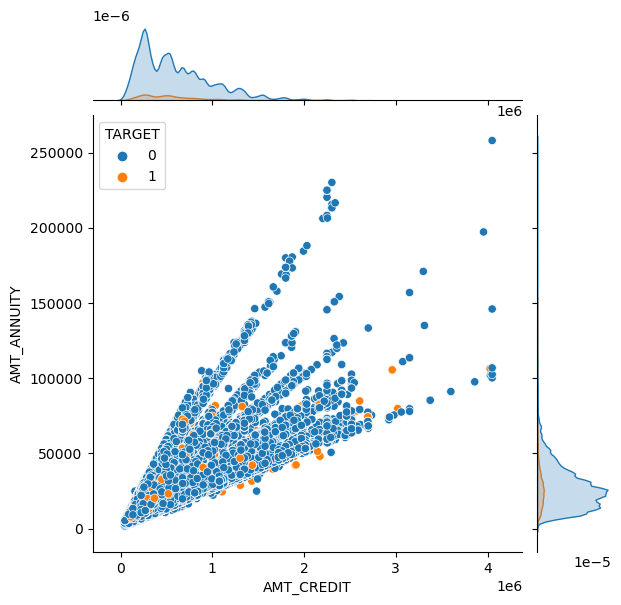

In [222]:
sns.jointplot(data=numerical_data, x='AMT_CREDIT', y='AMT_ANNUITY', hue='TARGET')
plt.show()

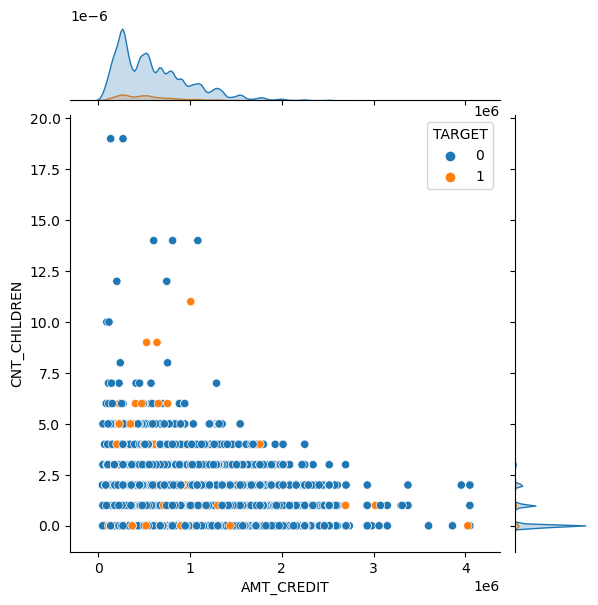

In [223]:
sns.jointplot(data=numerical_data, x='AMT_CREDIT', y='CNT_CHILDREN', hue='TARGET')
plt.show()

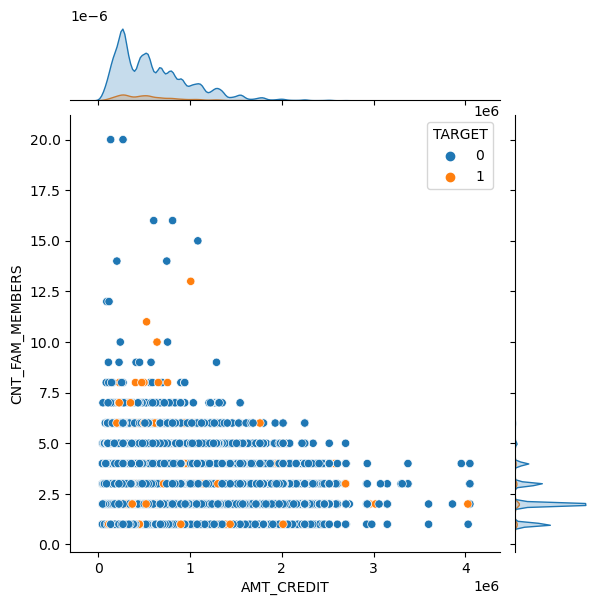

In [224]:
sns.jointplot(data=numerical_data, x='AMT_CREDIT', y='CNT_FAM_MEMBERS', hue='TARGET')
plt.show()

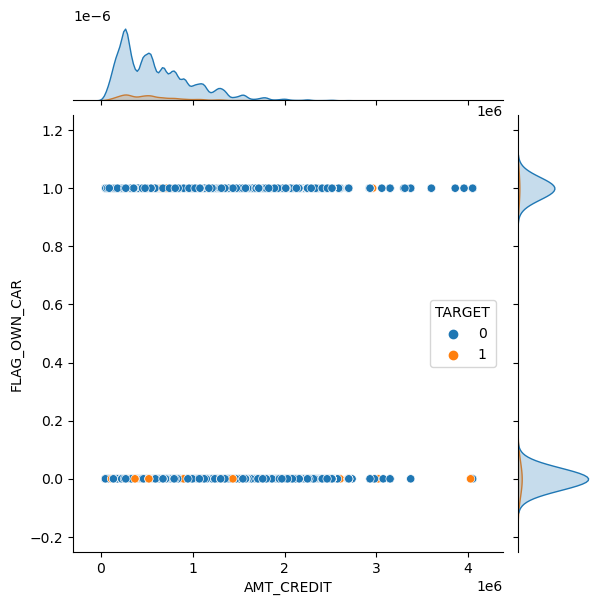

In [225]:
sns.jointplot(data=numerical_data, x='AMT_CREDIT', y='FLAG_OWN_CAR', hue='TARGET')
plt.show()

## <span style='color:red'> Pairplot for amt varibles.

In [205]:
import seaborn as sns

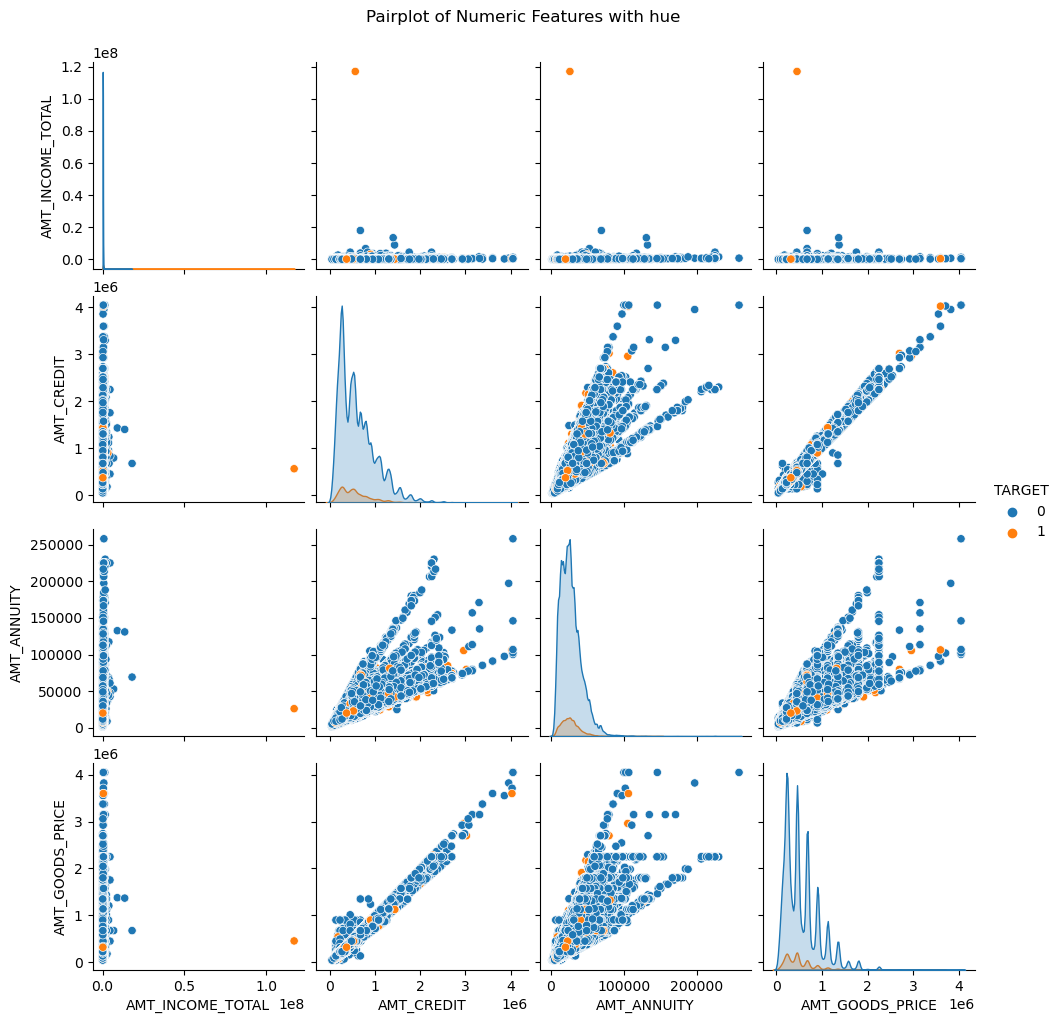

In [206]:
cols_of_intrest = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

sns.pairplot(numerical_data, vars=cols_of_intrest, hue='TARGET', diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features with hue ', y=1.02)
plt.show()

## <span style="color:blue"> Analysis -
    1. People who have no children and loan amount is upto 15 lakhs are more deafulters.
    2. People with no children and loan amount greter than 15 lakhs are less defaulters.
    3. People with more than 5 childrens are more defaulters.
    4. People between 1-4 childrens are less likely to default.
    
    5.client with more than 7 family members is most likely to default for credit upto 10 lakhs.   
    6. client with family members 4-5 are least likely to default in all loan ranges. 
    7. client with 2 family members are most likely to default for credit of upto 10 lakhs.
    
    8. Amount goods price and amount credit is linearly correlated.
    9. Most defaulters are in the segment of less than 1 million credit amount.
    10. Amount credit increases, defaulters are decraesing.

## <span style='color:red'> Previous Data Table

In [228]:
prev_appli.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [229]:
prev_appli.shape

(1670214, 26)

In [230]:
prev_appli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [231]:
prev_appli.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670213e+06     1.284699e+06             1.670214e+06   
mean   1.961140e+05     2.278473e+05             1.248418e+01   
std    3.185746e+05     3.153966e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     5.084100e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     2.340000e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.670214e+06   1.670214e+06      1.670214e+06  1.297984e+06  
mean             9.964675e-01  -8.806797e+02      3.139511e+02  1.605408e+01  
std              5.932963e-02   7.790997e+02      7.127443e+03  1.456729e+01  
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00  
25%              1.000000e+00  -1.300000e+03     -1.000000e+00  6.000000e+00  
50%              1.000000e+00  -5.810000e+02      3.000000e+00  1.200000e+01  
75%              1.000000e+00  -2.800000e+02      8.200000e+01  2.400000e+01  
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01

In [232]:
prev_appli.replace('XNA',np.nan,inplace=True)
prev_appli.replace('XAP', np.nan, inplace=True)

In [233]:
# Cols having more than 30% values:
prev_percent_null = (prev_appli.columns[(100 * prev_appli.isnull().mean())>=30]).tolist()
prev_percent_null

['NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP']

In [234]:
prev_appli= prev_appli.drop(prev_percent_null, axis=1)
prev_appli.shape

(1670214, 19)

In [235]:
prev_appli.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [236]:
irrelevant_Col = ['HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']

In [237]:
prev_appli = prev_appli.drop(irrelevant_Col, axis=1)
prev_appli.shape

(1670214, 15)

## Merging applicatiion data and previous appilcation 


In [243]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_C

In [246]:
col_current = ['SK_ID_CURR','TARGET','CODE_GENDER', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','Age_grp', 'Income_bin']


In [247]:
app_current_to_merge = app_data[col_current]
app_current_to_merge.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0      100002       1           M  Secondary / secondary special   
1      100003       0           F               Higher education   
2      100004       0           M  Secondary / secondary special   
3      100006       0           F  Secondary / secondary special   
4      100007       0           M  Secondary / secondary special   

     NAME_FAMILY_STATUS Age_grp   Income_bin  
0  Single / not married   18-30         High  
1               Married   40-50    Very_High  
2  Single / not married   50-60       Middle  
3        Civil marriage   50-60  Middle_High  
4  Single / not married   50-60  Middle_High

In [248]:
col_prev_todrop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [249]:
df_prev_to_merge = prev_appli.drop(col_prev_todrop, axis=1)
df_prev_to_merge.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT NAME_CONTRACT_STATUS  DAYS_DECISION NAME_CLIENT_TYPE  \
0     17145.0             Approved            -73         Repeater   
1    679671.0             Approved           -164         Repeater   
2    136444.5             Approved           -301         Repeater   
3    470790.0             Approved           -512         Repeater   
4    404055.0              Refused           -781         Repeater   

  NAME_PORTFOLIO             CHANNEL_TYPE  CNT_PAYMENT  
0            POS             Country-wide         12.0  
1           Cash           Contact center         36.0  
2           Cash  Credit and cash offices         12.0  
3           Cash  Credit and cash offices         12.0  
4           Cash  Credit and cash offices         24.0

In [250]:
df_merged = pd.merge(df_prev_to_merge,df_current_to_merge, on='SK_ID_CURR',how= 'left')
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT NAME_CONTRACT_STATUS  DAYS_DECISION NAME_CLIENT_TYPE  \
0     17145.0             Approved            -73         Repeater   
1    679671.0             Approved           -164         Repeater   
2    136444.5             Approved           -301         Repeater   
3    470790.0             Approved           -512         Repeater   
4    404055.0              Refused           -781         Repeater   

  NAME_PORTFOLIO             CHANNEL_TYPE  CNT_PAYMENT  TARGET CODE_GENDER  \
0            POS             Country-wide         12.0     0.0           F   
1           Cash           Contact center         36.0     0.0           F   
2           Cash  Credit and cash offices         12.0     0.0           F   
3           Cash  Credit and cash offices         12.0     0.0           M   
4           Cash  Credit and cash offices         24.0     0.0           F   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS Age_grp Income_bin  
0              Incomplete higher            Married   30-40  Very_High  
1  Secondary / secondary special     Civil marriage   50-60     Middle  
2  Secondary / secondary special            Married   18-30  Midle_low  
3  Secondary / secondary special            Married   60-70  Very_High  
4  Secondary / secondary special            Married   18-30       High

In [251]:
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT NAME_CONTRACT_STATUS  DAYS_DECISION NAME_CLIENT_TYPE  \
0     17145.0             Approved            -73         Repeater   
1    679671.0             Approved           -164         Repeater   
2    136444.5             Approved           -301         Repeater   
3    470790.0             Approved           -512         Repeater   
4    404055.0              Refused           -781         Repeater   

  NAME_PORTFOLIO             CHANNEL_TYPE  CNT_PAYMENT  TARGET CODE_GENDER  \
0            POS             Country-wide         12.0     0.0           F   
1           Cash           Contact center         36.0     0.0           F   
2           Cash  Credit and cash offices         12.0     0.0           F   
3           Cash  Credit and cash offices         12.0     0.0           M   
4           Cash  Credit and cash offices         24.0     0.0           F   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS Age_grp Income_bin  
0              Incomplete higher            Married   30-40  Very_High  
1  Secondary / secondary special     Civil marriage   50-60     Middle  
2  Secondary / secondary special            Married   18-30  Midle_low  
3  Secondary / secondary special            Married   60-70  Very_High  
4  Secondary / secondary special            Married   18-30       High

In [252]:
df_merged.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  DAYS_DECISION   CNT_PAYMENT        TARGET  
count  1.670213e+06   1.670214e+06  1.297984e+06  1.413701e+06  
mean   1.961140e+05  -8.806797e+02  1.605408e+01  8.655296e-02  
std    3.185746e+05   7.790997e+02  1.456729e+01  2.811789e-01  
min    0.000000e+00  -2.922000e+03  0.000000e+00  0.000000e+00  
25%    2.416050e+04  -1.300000e+03  6.000000e+00  0.000000e+00  
50%    8.054100e+04  -5.810000e+02  1.200000e+01  0.000000e+00  
75%    2.164185e+05  -2.800000e+02  2.400000e+01  0.000000e+00  
max    6.905160e+06  -1.000000e+00  8.400000e+01  1.000000e+00

In [253]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   SK_ID_PREV            1670214 non-null  int64   
 1   SK_ID_CURR            1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE    1669868 non-null  object  
 3   AMT_ANNUITY           1297979 non-null  float64 
 4   AMT_APPLICATION       1670214 non-null  float64 
 5   AMT_CREDIT            1670213 non-null  float64 
 6   NAME_CONTRACT_STATUS  1670214 non-null  object  
 7   DAYS_DECISION         1670214 non-null  int64   
 8   NAME_CLIENT_TYPE      1668273 non-null  object  
 9   NAME_PORTFOLIO        1297984 non-null  object  
 10  CHANNEL_TYPE          1670214 non-null  object  
 11  CNT_PAYMENT           1297984 non-null  float64 
 12  TARGET                1413701 non-null  float64 
 13  CODE_GENDER           1413701 non-null  object  
 14  NAME_EDUCATION_TYP

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

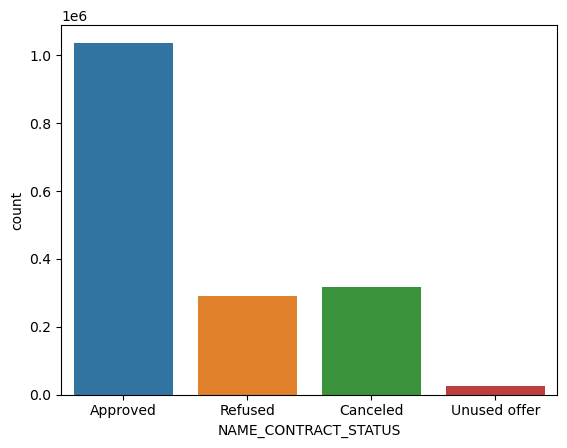

In [256]:
sns.countplot(x=df_merged.NAME_CONTRACT_STATUS)

## <span style='color:blue'> Conclusions:
  1. The factors deriving defaulters for example Laborer’s are more likely to default as compared to Managers, who receives higher and fixed source of income. 
  2. Company should target families with 1-4 children and should avoid giving loans with above 5 children as they are more likely to default. Probable reason for this behaviour is high responsibility and more dependents. 
  3. Client with no children are more likely to default so rate of interest can be made higher probably due to due to certain characteristics or irresponsible financial behaviors.
  4. Middle-high income group can be targeted more as they need more loans compared to other category so that they could invest. 
  5. People aged 30-40 years are highest to apply for loans and hence can be targeted more because they have the capacity and working age to repay the loan. 
 